<a href="https://colab.research.google.com/github/vaishveerkumar/Data-Science/blob/main/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ABSTRACT:**

Carbon dioxide (CO2) emissions wield considerable ramifications for the environment. The accumulation of CO2 in the atmosphere begets a greenhouse effect, fostering heat retention and thereby inducing global warming. This phenomenon results in a spectrum of adverse consequences, including elevated global temperatures, sea level escalation, shifts in weather patterns, and disruptions to ecosystems. The enduring repercussions of climate change pose a substantive threat to human health, agriculture, biodiversity, and socio-economic systems.

Consequently, the imperative to mitigate CO2 emissions assumes paramount importance. Such measures constitute a pivotal strategy in addressing climate change and attenuating its deleterious impact on the environment and human well-being

# **AIM:**

To Analyze the raw data collected from Kaggle and clean the data i.e. Imputing missing values, dealing with outliers etc. to build a predictive model.

# **VARIABLE DESCRIPTION:**

1. Make: The brand or manufacturer of the vehicle.
2. Model: The specific model or name of the vehicle.
3. Vehicle Class: The category or type of the vehicle, such as compact or SUV.
4. Engine Size (L): The size of the vehicle's engine, measured in liters.
5. Cylinders: The number of cylinders in the vehicle's engine.
6. Transmission: The type of transmission in the vehicle (e.g., AS5 for automatic, 5-speed).
7. Fuel Type: The type of fuel the vehicle uses.
8. Fuel Consumption City (L/100 km): The amount of fuel consumed per 100 kilometers during city driving.
9. Fuel Consumption Hwy (L/100 km): The amount of fuel consumed per 100 kilometers during highway driving.
10. Fuel Consumption Comb (L/100 km): The combined fuel consumption, representing a mix of city and highway driving.
11. Fuel Consumption Comb (mpg): The combined fuel consumption converted to miles per gallon (mpg).
12. CO2 Emissions (g/km): The amount of carbon dioxide emissions produced by the vehicle per kilometer traveled.This is the outcome variable to be predicted.

In [1]:
#installing dependencies
#"explain like I'm 5"); visualizing and interpreting the results of machine learning models; understand how the model makes predictions.

!pip install eli5

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=1748a4caa2d44218d75415f58c8d736849b732dad65a808e428c132b763259d7
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [10]:
!pip install google-colab

from google.colab import drive

!mkdir /content/drive

# Mount Google Drive
drive.mount('/content/drive')



mkdir: cannot create directory ‘/content/drive’: File exists
Mounted at /content/drive


In [11]:
file_path = '/content/drive/MyDrive/CO2 Emissions.csv'

# Reading the CO2 emissions dataset
data = pd.read_csv(file_path)

In [12]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
print(data.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


#Q1: What are the datatypes?

1.   Data set contains 12 features related to Co2 emission of a vehicle where make, model, vehicle class, transmission and fuel  type are categorical data or of data type:object and engine size(L), cylinders, Fuel Consumption City, Fuel Consumption Hwy, Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg),CO2 Emissions are numerical data or of datatype int or float.

2.  The Engine Size,Trasmission,Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) - **The independent variable**

  The CO2 emissions(g/km) -**The dependent variable**

3.   There are a total of 7385 observations.


In [14]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#Q2. Are there missing values?

No, there are no missing values in the dataset as indicated above
#Q5. Which independent variables have missing data? How much?

No missing data in the independent variables

**Dropping the following vehical data features:**

Make,
Model,
Vehicle Class


The "Make", "Model" and "Vehicle Class" columns serve as identifiers for individual vehicles. Including these columns in the predictive model might not contribute meaningful information as each row likely represents a unique vehicle. Vehicle Class is a categorical variable representing the type of vehicle.

In [15]:
data.drop(["Make","Model","Vehicle Class"],axis=1,inplace= True)

In [16]:
data.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Distributions**

1. A Q-Q plot assess whether a dataset follows a particular theoretical distribution. It compares the quantiles of the observed data against the quantiles of a specified theoretical distribution.

2. A dis plot provides a visual overview of the underlying distribution of the data, including information about central tendency, spread, and shape.

<Figure size 800x500 with 0 Axes>

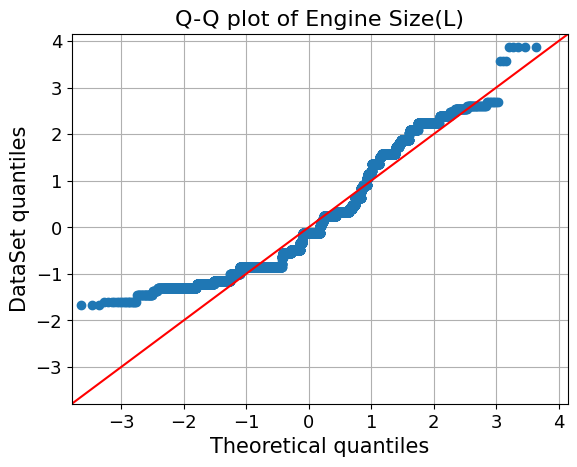

<Figure size 800x500 with 0 Axes>

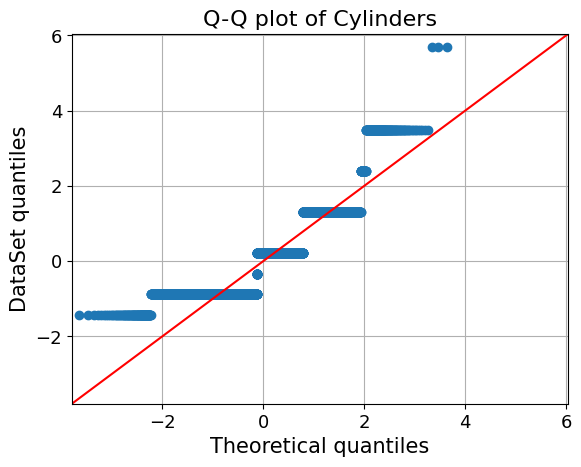

<Figure size 800x500 with 0 Axes>

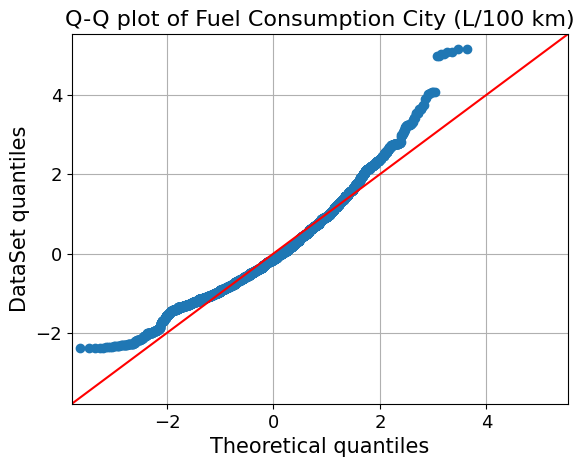

<Figure size 800x500 with 0 Axes>

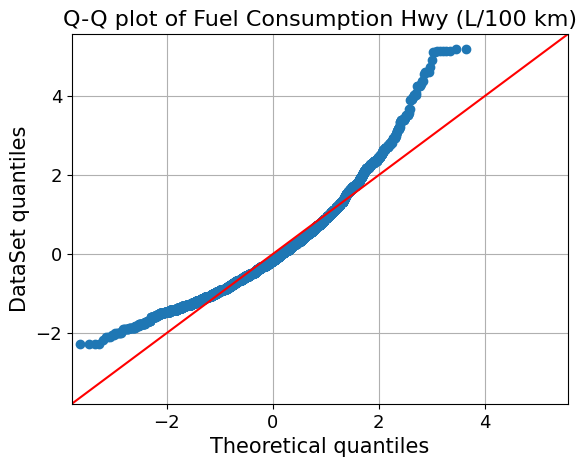

<Figure size 800x500 with 0 Axes>

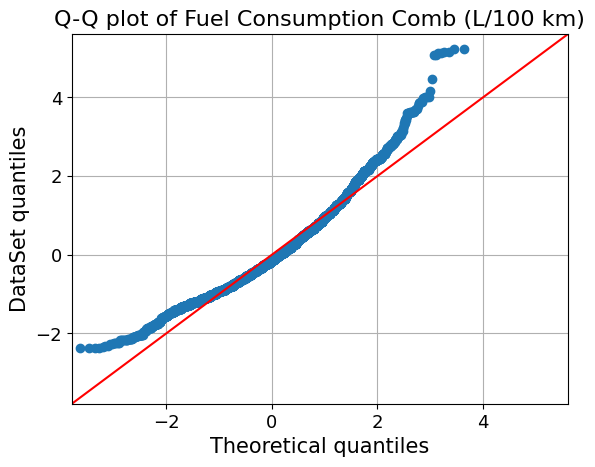

<Figure size 800x500 with 0 Axes>

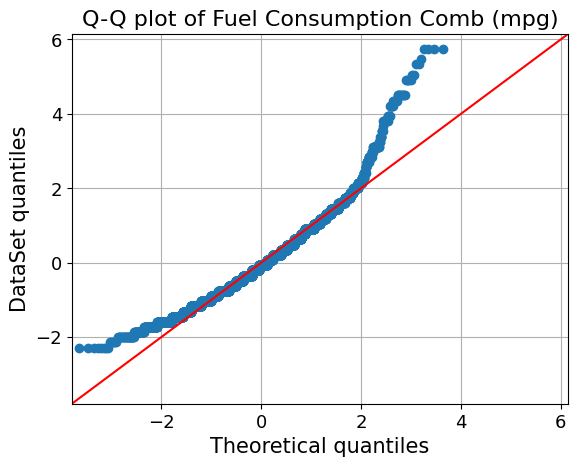

In [17]:
from statsmodels.graphics.gofplots import qqplot

data_norm = data[
    ["Engine Size(L)","Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)"]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("DataSet quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

Since engine size and cylinder is not even closely following normal distribution , we need to try and plot it to understand better

USING DIS PLOT FROM SEABORN TO GET A BETTER IDEA OF THE DISTRIBUTIONS FOR THE NUMERIC VARIABLES


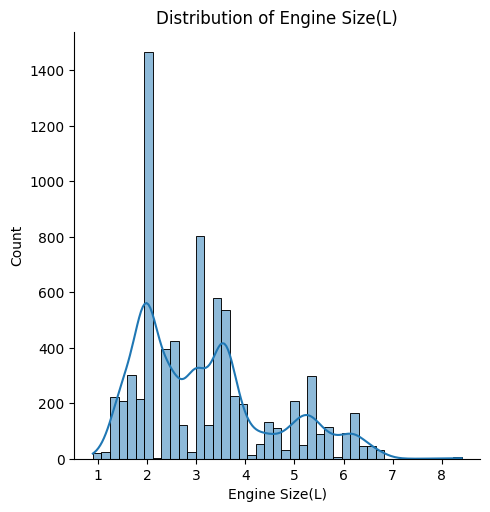

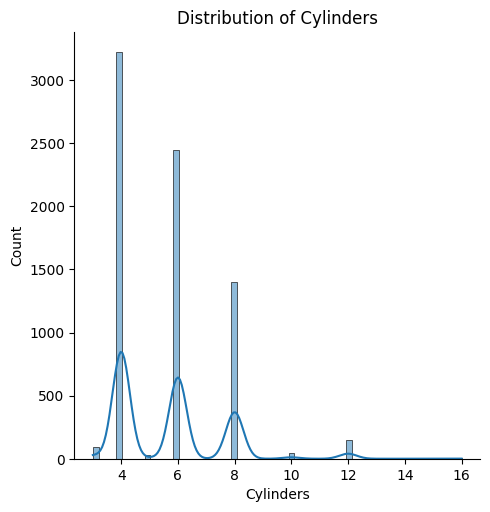

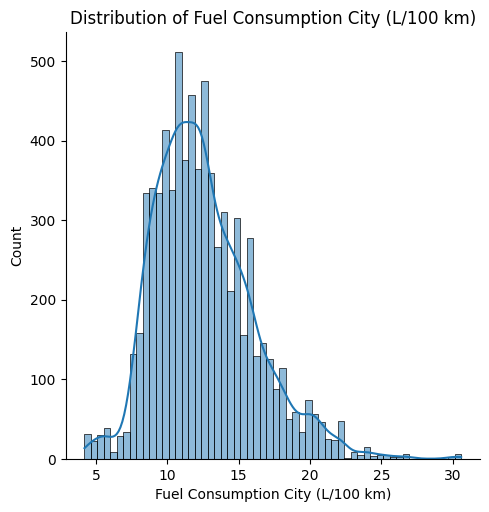

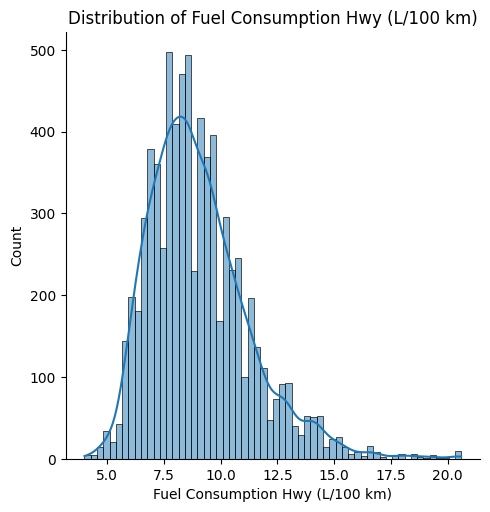

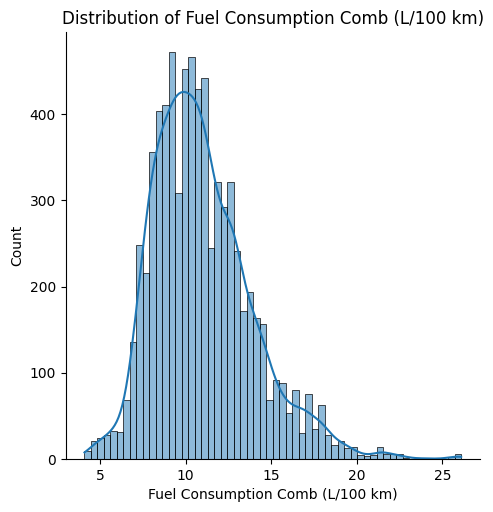

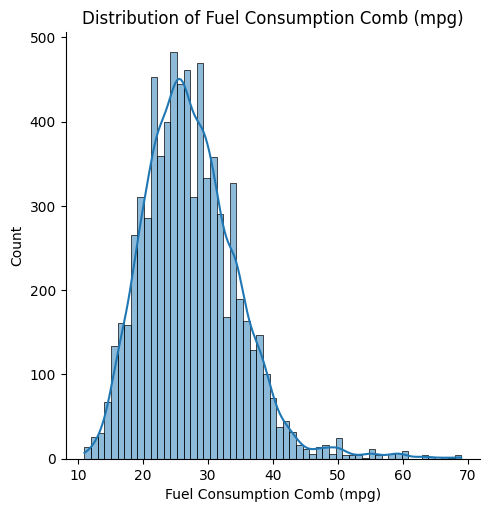

In [18]:
columns=data[
    ["Engine Size(L)","Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)"]
]

for column in columns:
    sns.displot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


# **Inference from the distributions**

#Q3: What are the likely distributions of the numeric variables?
#Q10. What are the distributions of the predictor variables?

1.

Distribution of Engine Size(L) is multimodal distribution with a right skewness, this can be infered from the dis plot of the Engine Size where there are multiple peaks. The tail is extending to the right indicating right skewness which means that fewer vehicles have large engines.

2.

Distribution of Cylinders is also multimodal with right skewed distribution(can be infered from histogram as well as dis plot) since tail is extending to the right, which means as there are fewer vehicles with more number of cylinders

Multimodal could have occured because of various times of vehicles that are included in the dataset.

3.

All other independant variables roughly follow normal distribution, there are a few outliers. This means that most values are close to the mean, with fewer values farther away near the tail

**For categorical variables-
Transmission and Fuel Type we can find frequency distribution which is the no of occurences and relative frequency of each category(count of each category/no of occurences)**

In [19]:
category_counts = data['Transmission'].value_counts()
category_proportions = data['Transmission'].value_counts(normalize=True)

print("Category Counts:\n", category_counts)
print("\nCategory Proportions:\n", category_proportions)

columns_to_count = ['Transmission','Fuel Type']

for column in columns_to_count:
    category_counts = data[column].value_counts()
    category_proportions = data[column].value_counts(normalize=True)

    print(f"Category Counts for {column}:\n", category_counts)
    print(f"\nCategory Proportions for {column}:\n", category_proportions)
    print("\n")

Category Counts:
 AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

Category Proportions:
 AS6     0.179282
AS8     0.163981
M6      0.122004
A6      0.106838
A8      0.066351
AM7     0.060257
A9      0.045904
AS7     0.043196
AV      0.039946
M5      0.026134
AS10    0.022749
AM6     0.017874
AV7     0.015978
AV6     0.015301
M7      0.012322
A5      0.011374
AS9     0.010427
A4      0.008802
AM8     0.008395
A7      0.007177
AV8     0.005281
A10     0.004198
AS5     0.003521
AV10    0.001490
AM5     0.000542
AM9     0.000406
AS4     0.000271
Name: Transmission, dtype: float64
Category Counts for Transmission:
 AS6     1324
AS8     1211
M6       901
A6    

<Axes: >

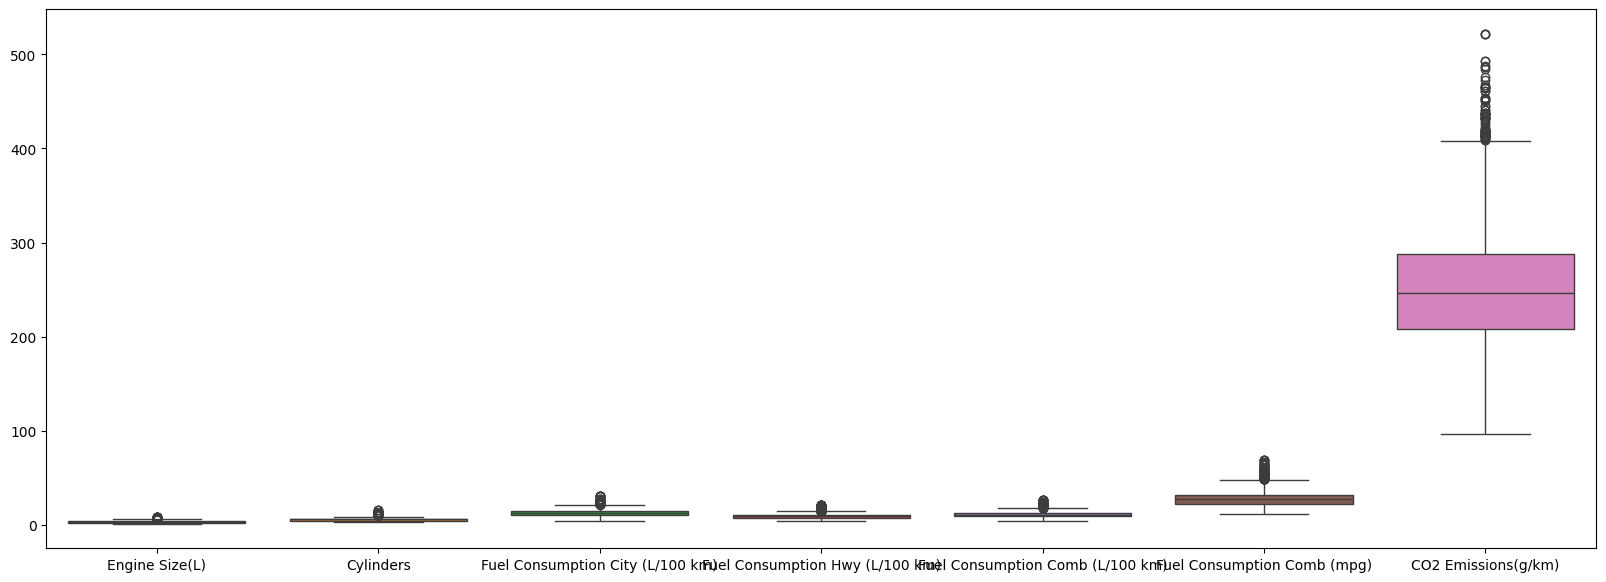

In [20]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

# **One hot encoding of categorical data**
One-hot encoding is a technique used in machine learning and data processing to represent categorical variables as binary vectors. It is a way of converting categorical data into a format that can be provided to machine learning algorithms to improve their performance.

**Converting fuel type and transmission variables:**

In [21]:
data = pd.get_dummies(data, columns=['Transmission', 'Fuel Type'],dtype=int)

data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#Q9. Do the ranges of the predictor variables make sense?

In [22]:
#Range of each column
data.max() - data.min()

Engine Size(L)                        7.5
Cylinders                            13.0
Fuel Consumption City (L/100 km)     26.4
Fuel Consumption Hwy (L/100 km)      16.6
Fuel Consumption Comb (L/100 km)     22.0
Fuel Consumption Comb (mpg)          58.0
CO2 Emissions(g/km)                 426.0
Transmission_A10                      1.0
Transmission_A4                       1.0
Transmission_A5                       1.0
Transmission_A6                       1.0
Transmission_A7                       1.0
Transmission_A8                       1.0
Transmission_A9                       1.0
Transmission_AM5                      1.0
Transmission_AM6                      1.0
Transmission_AM7                      1.0
Transmission_AM8                      1.0
Transmission_AM9                      1.0
Transmission_AS10                     1.0
Transmission_AS4                      1.0
Transmission_AS5                      1.0
Transmission_AS6                      1.0
Transmission_AS7                  

# **Inference from the ranges**

1. Engine Size(L): A range of 7.5 suggests that engine sizes vary from very small to quite large. This is a reasonable range for consumer vehicles.

2. Cylinders: A range of 13 cylinders indicates that my dataset includes a variety of vehicles, from those with very few cylinders to those with many cylinders.

3. Fuel Consumption City (L/100 km): A range of 26.4 L/100 km indicates significant variability in fuel consumption among city driving conditions which can include very efficient compact cars on the lower end and less efficient larger vehicles or on the higher end.

4. Fuel Consumption Hwy (L/100 km): A range of 16.6 L/100 km for highway fuel consumption also shows a range and could mean that vehicles are more fuel-efficient on the highway than in the city, hence the smaller range compared to city consumption.

5. Fuel Consumption Comb (mpg): The combined fuel consumption in miles per gallon ranges from the minimum to the maximum by 58.

6. For the categorical features like Transmission,Fuel Type a range of 1.0 is expected because these columns are binary, indicating the presence or absence of each type in the vehicle.

**Normalizing the data in the Engine Size, Cylinders, all the Fuel Consumption columns and CO2 emissions for better visualization and also because normalization adjusts these values to a common scale without distorting differences in the ranges of values**

In [23]:
from sklearn import preprocessing

columns_to_scale = ['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']

# Create x to store values as floats
x = data[columns_to_scale].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[columns_to_scale] = pd.DataFrame(x_scaled, columns=columns_to_scale)

In [24]:
data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.146667,0.076923,0.246212,0.222892,0.240909,0.327586,0.288732,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,0.146667,0.076923,0.265152,0.259036,0.263636,0.310345,0.319249,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,0.146667,0.076923,0.284091,0.277108,0.281818,0.275862,0.338028,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,0.146667,0.076923,0.265152,0.259036,0.263636,0.310345,0.319249,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

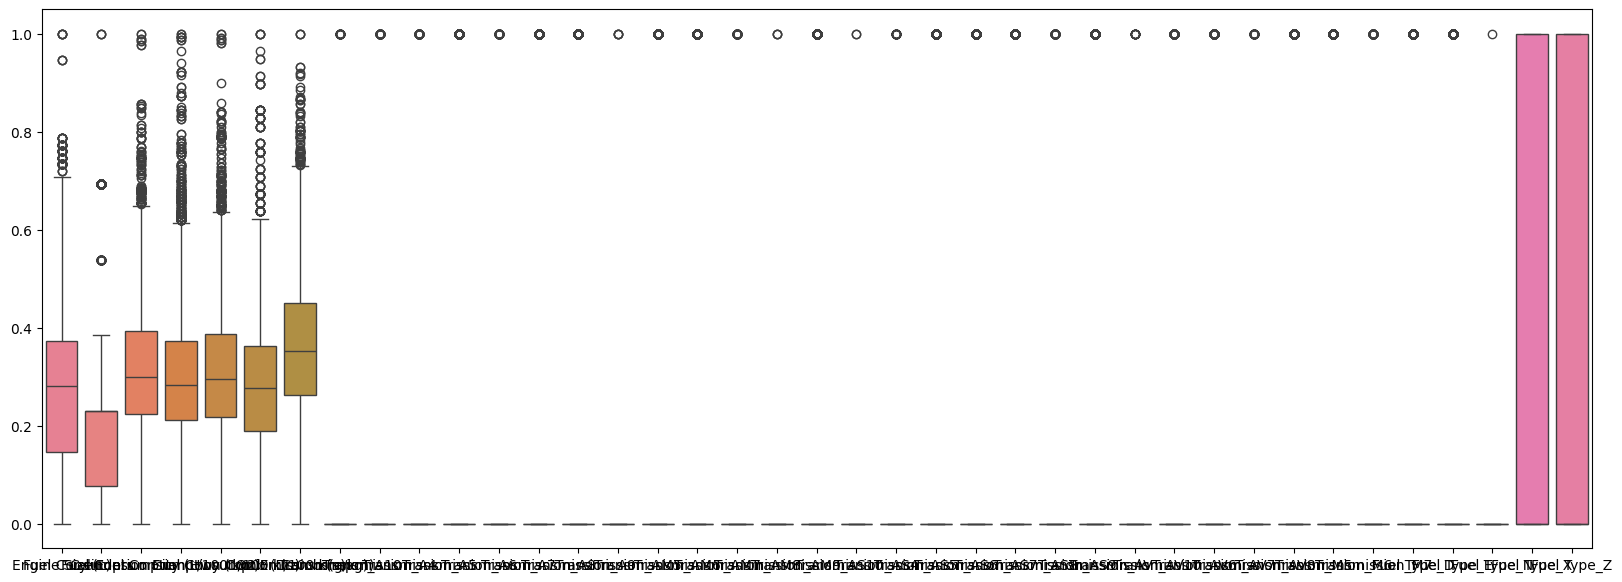

In [25]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

# **Inference from the Box Plot**

1. Engine Size (L): The engine size has a range of values with some outliers on the higher end. This could mean that most vehicles have a moderate engine size, but there are a few which have significantly larger engines and could potentially contribute to higher CO2 emissions.

2. Cylinders: Similar to the engine size, there is a range of values with outliers indicating that there are vehicles with a higher number of cylinders. More cylinders generally means a larger engine volume and possibly higher emissions.

3. Fuel Consumption (City, Hwy, Comb in L/100 km): All three fuel consumption measures have a significant number of outliers  above the upper quartile, indicating some vehicles consume much more fuel than average. In Cities or city driving conditions(Stop and go)- the outliers indicate that there are a few vehicles that are much less fuel-efficient which leads to higher fuel consumption rates

4. Fuel Consumption (Comb in mpg): Higher mpg value indicates better fuel efficiency because the vehicle can travel more miles per gallon of fuel consumed. The combined fuel efficiency in miles per gallon seems to have a outliers which shows that there are a few exceptional vehicles that are significantly more fuel-efficient than the rest.

#Q7. Are the predictor variables independent of all the other predictor variables?

Checking Correlation between the independent and target variable can help identify if the predictor variables are independent of all other predictor variables

 1 indicates a perfect positive linear relationship: as one variable increases, the other variable also increases.

-1 indicates a perfect negative linear relationship: as one variable increases, the other variable decreases.

 0 indicates no linear relationship: the variables do not have a tendency to increase or decrease together.

**CORRELATION ANALYSIS WITH HEATMAP**

In [26]:
data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145,0.115444,0.035005,0.082283,...,-0.085643,-0.040485,-0.160277,-0.155131,0.046261,-0.068055,0.164828,0.003781,-0.236023,0.186346
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644,0.073244,0.021429,0.046335,...,-0.078310,-0.041885,-0.149358,-0.154826,0.045005,-0.053873,0.118302,0.002451,-0.310360,0.277499
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592,0.047660,0.092999,0.082107,...,-0.124949,-0.049058,-0.145531,-0.118235,0.014994,-0.111228,0.450996,0.008789,-0.321992,0.160233
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536,0.053677,0.138233,0.076236,...,-0.106043,-0.023289,-0.128692,-0.151254,-0.004302,-0.119631,0.483037,0.002398,-0.257733,0.084032
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052,0.050234,0.109781,0.080967,...,-0.119910,-0.040648,-0.141211,-0.130877,0.008220,-0.115252,0.467394,0.006940,-0.303291,0.135427
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426,-0.051244,-0.058000,-0.083251,...,0.130543,0.032609,0.147897,0.115229,-0.031882,0.118642,-0.323444,-0.008822,0.309235,-0.205789
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000,0.071659,0.068239,0.088082,...,-0.125544,-0.041154,-0.154613,-0.117452,0.019191,-0.034712,0.096197,-0.007476,-0.260382,0.231164
Transmission_A10,0.115444,0.073244,0.047660,0.053677,0.050234,-0.051244,0.071659,1.000000,-0.006118,-0.006964,...,-0.008273,-0.004731,-0.010636,-0.024202,-0.007252,0.058733,-0.014911,-0.000756,-0.047200,0.036172
Transmission_A4,0.035005,0.021429,0.092999,0.138233,0.109781,-0.058000,0.068239,-0.006118,1.000000,-0.010108,...,-0.012008,-0.006866,-0.015437,-0.035127,-0.010525,-0.014681,0.084685,-0.001097,0.049263,-0.082446
Transmission_A5,0.082283,0.046335,0.082107,0.076236,0.080967,-0.083251,0.088082,-0.006964,-0.010108,1.000000,...,-0.013668,-0.007815,-0.017571,-0.039984,-0.011981,-0.016711,0.004633,-0.001248,0.088454,-0.086116


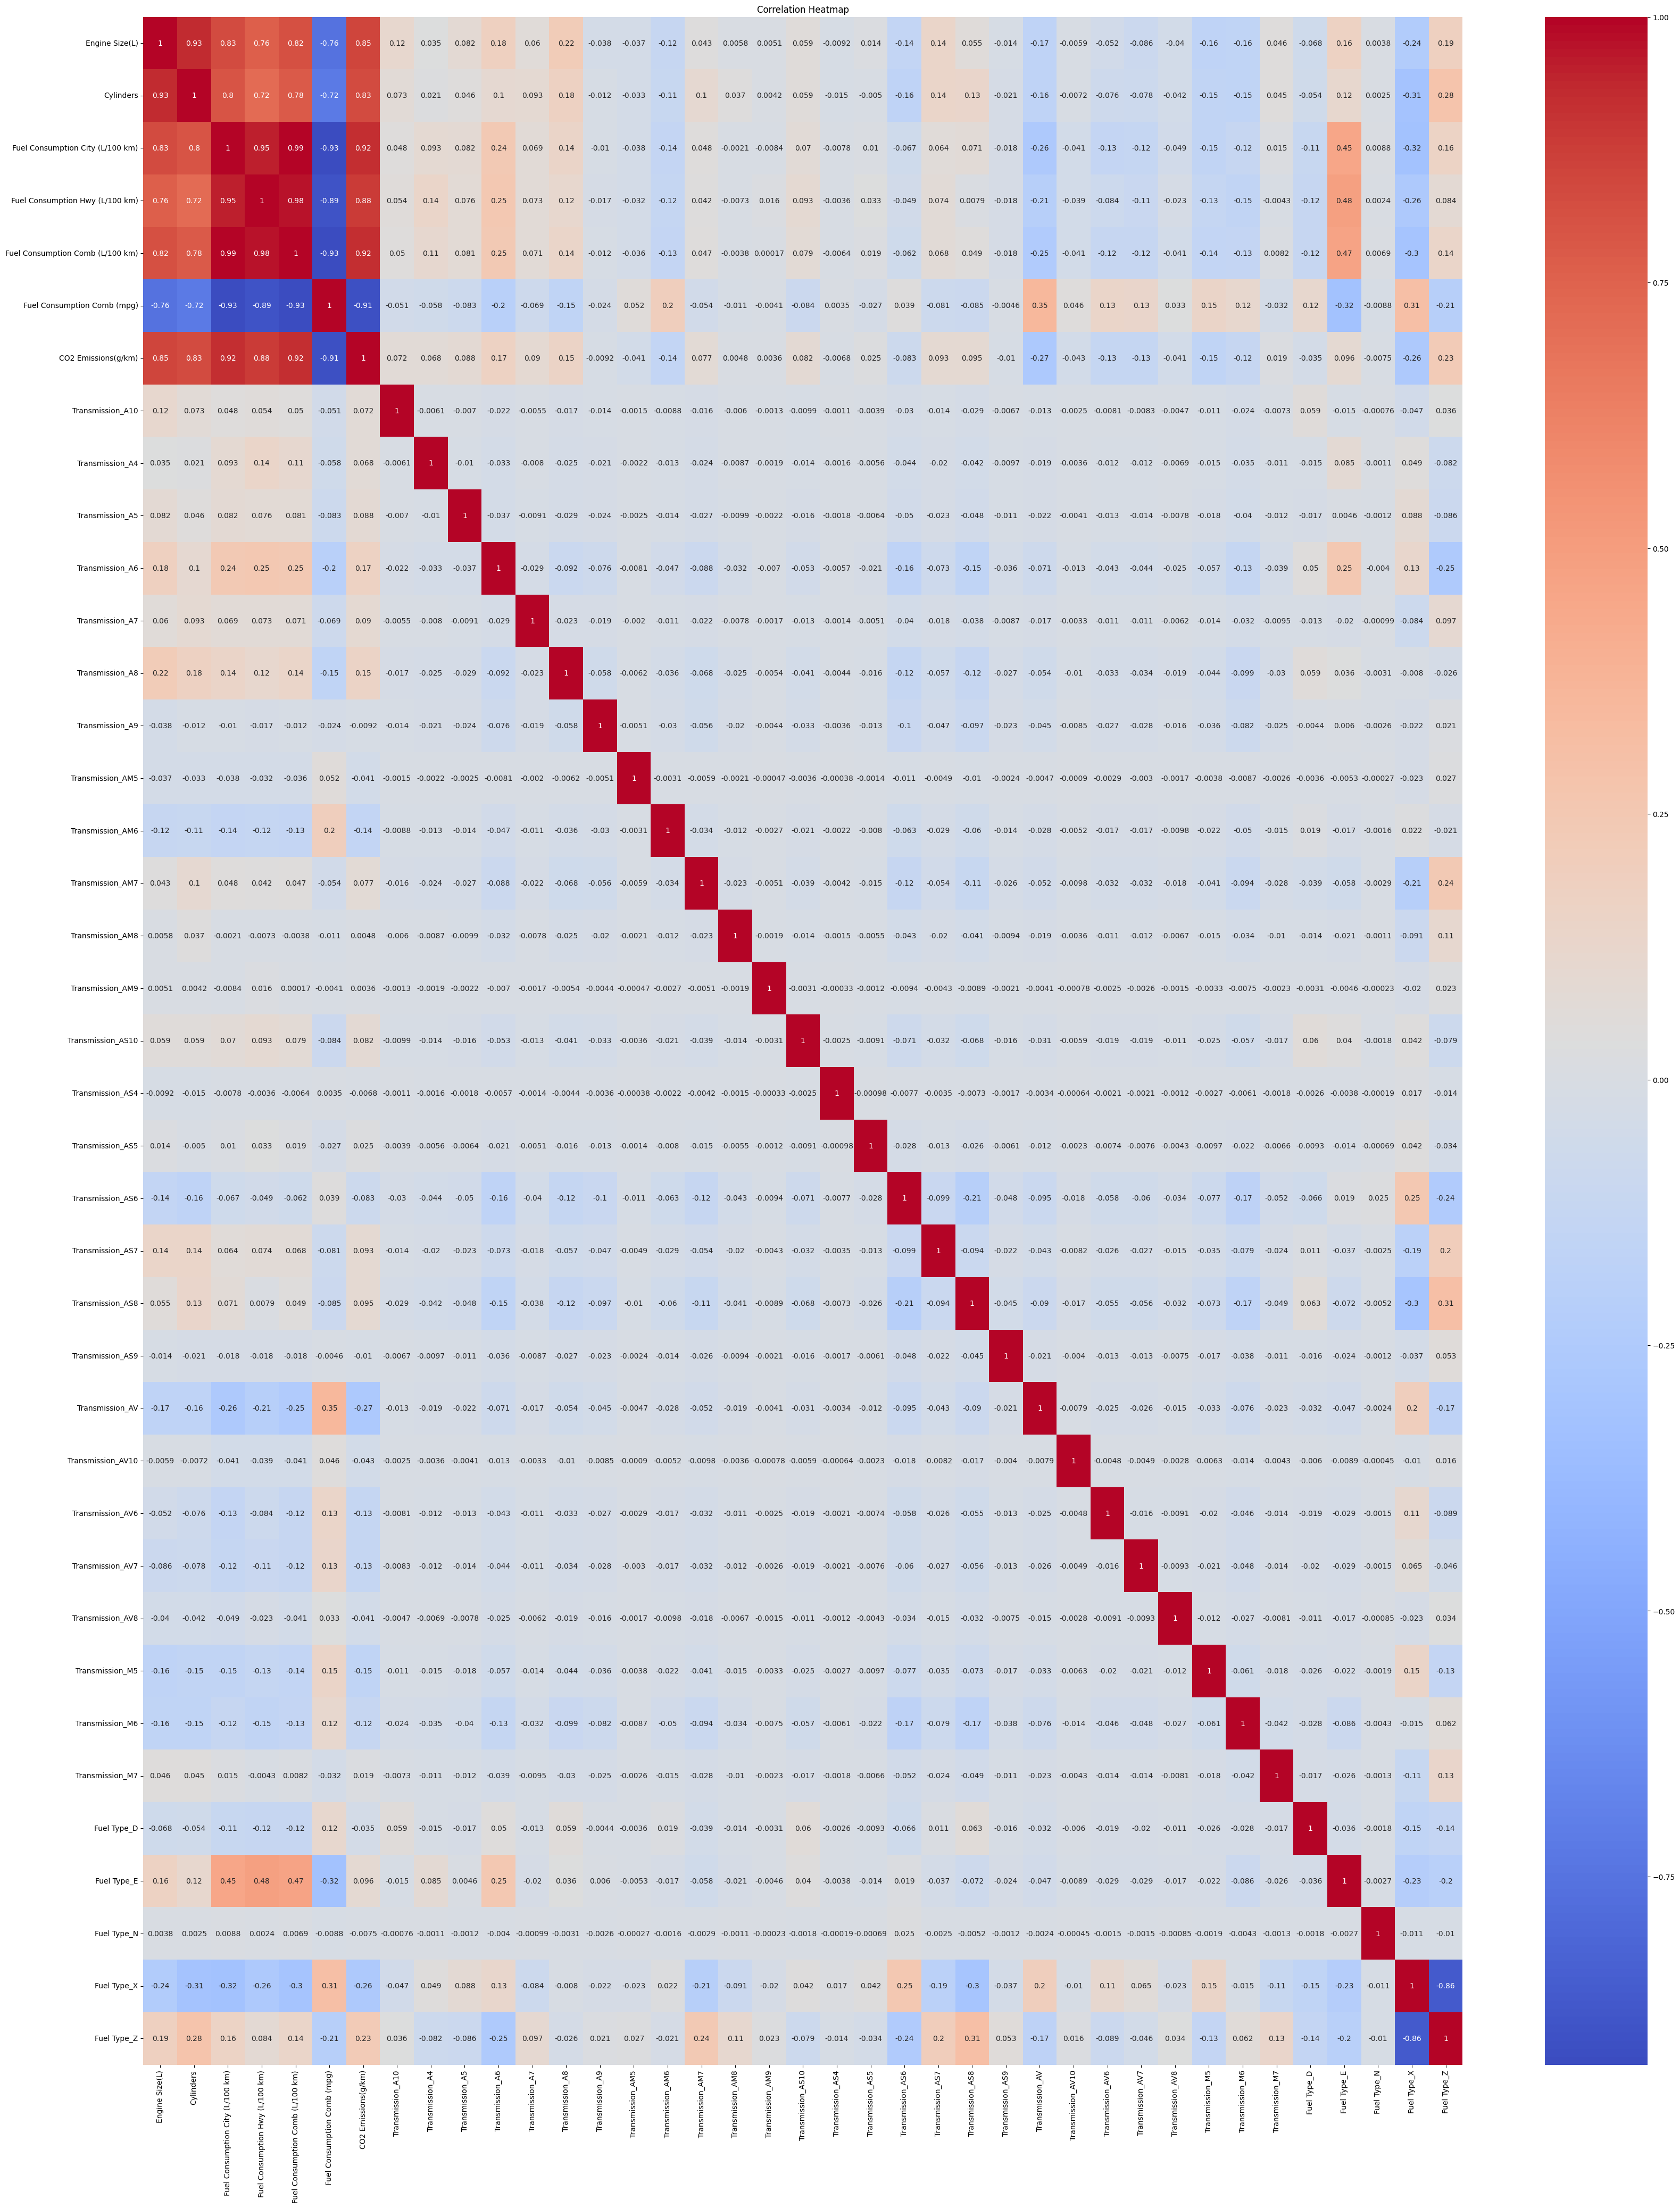

In [30]:
# the heat map of the correlation
plt.figure(figsize=(40, 50))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# Correlation analysis

correlation_matrix = data.corr()
emission_correlation = correlation_matrix["CO2 Emissions(g/km)"].sort_values(ascending=False)
print(emission_correlation)

CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Hwy (L/100 km)     0.883536
Engine Size(L)                      0.851145
Cylinders                           0.832644
Fuel Type_Z                         0.231164
Transmission_A6                     0.168321
Transmission_A8                     0.151831
Fuel Type_E                         0.096197
Transmission_AS8                    0.095415
Transmission_AS7                    0.092683
Transmission_A7                     0.090287
Transmission_A5                     0.088082
Transmission_AS10                   0.081813
Transmission_AM7                    0.076568
Transmission_A10                    0.071659
Transmission_A4                     0.068239
Transmission_AS5                    0.024921
Transmission_M7                     0.019191
Transmission_AM8                    0.004838
Transmission_AM9                    0.003589
Transmissi

# **Inference from the Correlation Matrix**
1.


CO2 Emissions(g/km) shows moderate positive correlations with Engine Size(L) (0.85), Cylinders (0.83), and Fuel Consumption Comb (0.92).This indicates that larger engines, more cylinders, and higher fuel consumption are associated with higher CO2 emissions.

2.

Engine Size and Cylinders:
There is a very high positive correlation indicating that as engine size increases the number of cylinders tends to increase. They are strongly related, because larger engines generally contain more cylinders.

3.

Fuel Consumption and Engine Characteristics:
Engine Size(L) and Cylinders show strong positive correlations with Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) and Fuel Consumption Comb (L/100 km) suggesting that vehicles with larger engine sizes and more cylinders consume more fuel both in city and highway driving conditions.

4.

Fuel Consumption Across Different Conditions:
Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) and Fuel Consumption Comb (L/100 km) are all highly positively correlated with each other indicating that vehicles that consume more fuel in the city also consume more on the highway.

5.

Fuel Efficiency (mpg) and Fuel Consumption:
There is a strong negative correlation between Fuel Consumption Comb (mpg) and the other fuel consumption measures which is expected because Fuel Consumption Comb (mpg) is a measure of fuel efficiency where higher values are better and the other variables measure the quantity of fuel used (where higher values indicate more consumption).

6.

Fuel Efficiency (mpg) and Engine Characteristics:
There is also a strong negative correlation between Fuel Consumption Comb (mpg) and both Engine Size(L) and Cylinders. This implies that as the engine size and the number of cylinders increase, fuel efficiency decreases.

7.

Transmission types generally have weak correlations with other variables.

8.

Fuel Type_E has a strong negative correlation with CO2 Emissions(g/km) (-0.32), indicating a potential association with lower emissions.
Warmer colors indicate a stronger positive correlation, while cooler colors indicate a stronger negative correlation


#Q4 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
#Q8 Which predictor variables are the most important?

For a regression model, the most useful Independent Variables can be statistically determined using the following methods:

1.  Ordinary Least Squares
2. Random Forest Feature Importance
3. Permutation-based feature selection


**Ordinary Least Squares (OLS)**

OLS is a way to find the best-fitting linear relationship between the independent variable(s) and the dependent variable.

In OLS regression, each independent variable is associated with a coefficient that represents the estimated change in the dependent variable for a one-unit change in that variable, holding other variables constant.

**Features with low p-values are considered more likely to be significant predictors. Therefore, one can use p-values as a criterion for feature selection.**

In [32]:
import statsmodels.api as sm

independent_vars = [
    'Engine Size(L)',
    'Cylinders',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)',
    'Transmission_A10',
    'Transmission_A4',
    'Transmission_A5',
    'Transmission_A6',
    'Transmission_A7',
    'Transmission_A8',
    'Transmission_A9',
    'Transmission_AM5',
    'Transmission_AM6',
    'Transmission_AM7',
    'Transmission_AM8',
    'Transmission_AM9',
    'Transmission_AS10',
    'Transmission_AS4',
    'Transmission_AS5',
    'Transmission_AS6',
    'Transmission_AS7',
    'Transmission_AS8',
    'Transmission_AS9',
    'Transmission_AV',
    'Transmission_AV10',
    'Transmission_AV6',
    'Transmission_AV7',
    'Transmission_AV8',
    'Transmission_M5',
    'Transmission_M6',
    'Transmission_M7',
    'Fuel Type_D',
    'Fuel Type_E',
    'Fuel Type_N',
    'Fuel Type_X',
    'Fuel Type_Z',
]

# Add the constant term
X = sm.add_constant(data[independent_vars])

# Fit the OLS model
model = sm.OLS(data["CO2 Emissions(g/km)"], X).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.993
Method:                  Least Squares   F-statistic:                 2.952e+04
Date:                 Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                         23:38:36   Log-Likelihood:                 22575.
No. Observations:                 7385   AIC:                        -4.508e+04
Df Residuals:                     7348   BIC:                        -4.482e+04
Df Model:                           36                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0019      0.003      0.744      0.457      -0.003       0.007
Engine Size(L)                       0.0050      0.002      2.092      0.037       0.000       0.010
Cylinders                            0.0306      0.003     10.609      0.000       0.025       0.036
Fuel Consumption City (L/100 km)     0.3990      0.046      8.712      0.000       0.309       0.489
Fuel Consumption Hwy (L/100 km)      0.2198      0.024      9.271      0.000       0.173       0.266
Fuel Consumption Comb (L/100 km)     0.4153      0.069      6.004      0.000       0.280       0.551
Fuel Consumption Comb (mpg)         -0.1182      0.003    -34.244      0.000      -0.125      -0.111
Transmission_A10                     0.0066      0.002      3.191      0.001       0.003       0.011
Transmission_A4                     -0.0191      0.002    -12.695      0.000      -0.022      -0.016
Transmission_A5                     -0.0002      0.001     -0.150      0.881      -0.003       0.002
Transmission_A6                     -0.0019      0.001     -2.867      0.004      -0.003      -0.001
Transmission_A7                      0.0050      0.002      3.081      0.002       0.002       0.008
Transmission_A8                      0.0023      0.001      3.129      0.002       0.001       0.004
Transmission_A9                      0.0028      0.001      3.612      0.000       0.001       0.004
Transmission_AM5                     0.0038      0.006      0.681      0.496      -0.007       0.015
Transmission_AM6                     0.0057      0.001      5.135      0.000       0.004       0.008
Transmission_AM7                     0.0018      0.001      2.417      0.016       0.000       0.003
Transmission_AM8                  6.681e-05      0.001      0.045      0.964      -0.003       0.003
Transmission_AM9                     0.0091      0.006      1.427      0.154      -0.003       0.022
Transmission_AS10                    0.0033      0.001      3.352      0.001       0.001       0.005
Transmission_AS4                    -0.0079      0.008     -1.010      0.313      -0.023       0.007
Transmission_AS5                    -0.0030      0.002     -1.357      0.175      -0.007       0.001
Transmission_AS6                     0.0003      0.001      0.483      0.629      -0.001       0.001
Transmission_AS7                    -0.0012      0.001     -1.431      0.153      -0.003       0.000
Transmission_AS8                     0.0010      0.001      1.618      0.106      -0.000       0.002
Transmission_AS9                     0.0009      0.001      0.637      0.524      -0.002       0.004
Transmission_AV                      0.0030      0.001      3.359      0.001       0.001       0.005
Transmission_AV10                   -0.001

# **Inference from OLS Method**
1.

R-squared:

The high R-squared value (0.993) indicates that the model explains approximately 99.3% of the variance in the dependent variable.

2.

Significant Variables:

Variables with low p-values ie, Fuel Consumption, Fuel Type, Engine Size, Cylinders are considered statistically significant.

3.

Coefficients:

Positive coefficients indicate a positive relationship with the dependent variable that is dependent variable increases as independant variable increases, while negative coefficients indicate a negative relationship that is as independent variable increases the dependent variable decreases.


**RANDOM FOREST FEATURE IMPORTANCE**

Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their predictions.

**Feature importance in a Random Forest is determined by assessing how much each feature contributes to the reduction in impurity across all trees.**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop("CO2 Emissions(g/km)", axis=1)
y = data["CO2 Emissions(g/km)"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.010623242841594e-05
R-squared: 0.9968287732008153


# **Inference from Random Forest Prediction:-**
Mean Squared Error is a measure of the average squared difference between the actual and predicted values

    **MSE close to zero (6.01e-05) indicates that model's predictions are very accurate.**

R squared is a measure of how well the predictions of a model match the variability in the actual data

    R-squared value of 0.9968 means that approximately 99.68% of the variance in "CO2 Emissions(g/km)" is explained

In [34]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

                             Feature    Importance
4   Fuel Consumption Comb (L/100 km)  8.722388e-01
5        Fuel Consumption Comb (mpg)  4.900216e-02
34                       Fuel Type_E  4.828263e-02
2   Fuel Consumption City (L/100 km)  1.121418e-02
0                     Engine Size(L)  9.575954e-03
33                       Fuel Type_D  5.516671e-03
1                          Cylinders  2.077283e-03
3    Fuel Consumption Hwy (L/100 km)  1.317046e-03
15                  Transmission_AM7  9.590778e-05
22                  Transmission_AS7  9.435531e-05
21                  Transmission_AS6  8.228709e-05
9                    Transmission_A6  7.709587e-05
12                   Transmission_A9  6.091769e-05
23                  Transmission_AS8  6.017739e-05
31                   Transmission_M6  4.353896e-05
30                   Transmission_M5  4.265336e-05
36                       Fuel Type_X  4.093424e-05
37                       Fuel Type_Z  3.553169e-05
11                   Transmissi

**Inference from Feature Importance using Random Forest Prediction**

1.
Fuel Consumption Comb (L/100 km): This feature has the highest importance score (8.722313e-01), suggesting that it plays a crucial role in predicting CO2 emissions.

2. Fuel Consumption Comb (mpg): This is the second most important feature, with a smaller importance score (4.900147e-02). It still contributes significantly to the model's predictions.

3. Fuel Type_E, Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km): These features also have importance scores, indicating their respective contributions to the model.

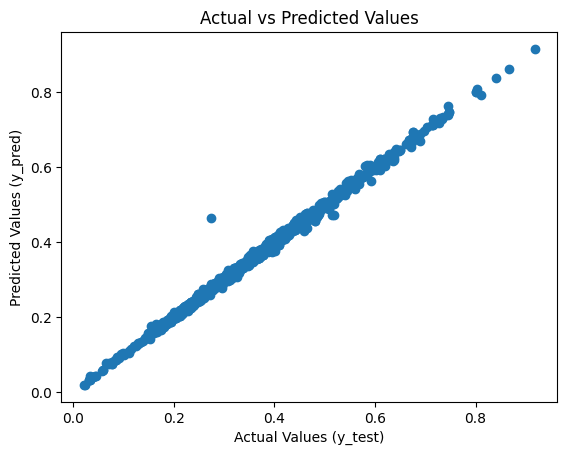

In [35]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()

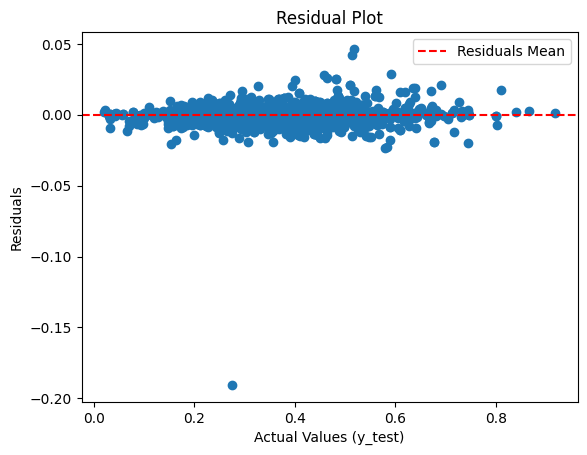

In [36]:
residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--', label="Residuals Mean")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

# **Inference from Residual Plot**

Most residuals are clustered around the mean of zero, which indicates that the model is performing well.

There is one point that stands out at the bottom, which could be an instance where the model dint predict well.

**PERMUTATION BASED FEATURE SELECTION**

 Permutation-based feature selection assesses the importance of features by comparing the model's performance with the original features and the performance after permuting (shuffling) the values of a particular feature

In [37]:
from sklearn.inspection import permutation_importance


Xp = data.drop("CO2 Emissions(g/km)", axis=1)
yp = data["CO2 Emissions(g/km)"]

# Split the dataset into training and testing sets
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model_p = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model_p.fit(X_train, y_train)

# Perform permutation-based feature selection
result = permutation_importance(rf_model_p, Xp_test, yp_test, n_repeats=10, random_state=42)

# Get the importance scores and indices of features
importance_scores = result.importances_mean
feature_indices = np.argsort(importance_scores)[::-1]

# Print feature importance
for idx in feature_indices:
    print(f"Feature: {Xp.columns[idx]}, Importance: {importance_scores[idx]}")

# Make predictions on the test set
yp_pred = rf_model_p.predict(Xp_test)

Feature: Fuel Consumption Comb (L/100 km), Importance: 1.9144126595083946
Feature: Fuel Type_E, Importance: 0.2329767783185467
Feature: Fuel Type_D, Importance: 0.013951381805420947
Feature: Fuel Consumption Comb (mpg), Importance: 0.013926639123973216
Feature: Fuel Consumption City (L/100 km), Importance: 0.004050320318234657
Feature: Fuel Consumption Hwy (L/100 km), Importance: 0.0009668352217529818
Feature: Engine Size(L), Importance: 0.0003229575724494227
Feature: Transmission_AS6, Importance: 5.8184025310303865e-05
Feature: Transmission_A9, Importance: 5.4804219881154916e-05
Feature: Transmission_AS7, Importance: 5.131125413581073e-05
Feature: Transmission_A6, Importance: 4.0820079779391175e-05
Feature: Transmission_AS8, Importance: 3.2115142083666284e-05
Feature: Cylinders, Importance: 2.2958900601000032e-05
Feature: Transmission_M5, Importance: 1.4795055982486094e-05
Feature: Transmission_A8, Importance: 1.1002071037979898e-05
Feature: Transmission_AM6, Importance: 6.96906322487

In [38]:
# Evaluate the model
mse_p = mean_squared_error(yp_test, yp_pred)
r2_p = r2_score(yp_test, yp_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.010623242841594e-05
R-squared: 0.9968287732008153


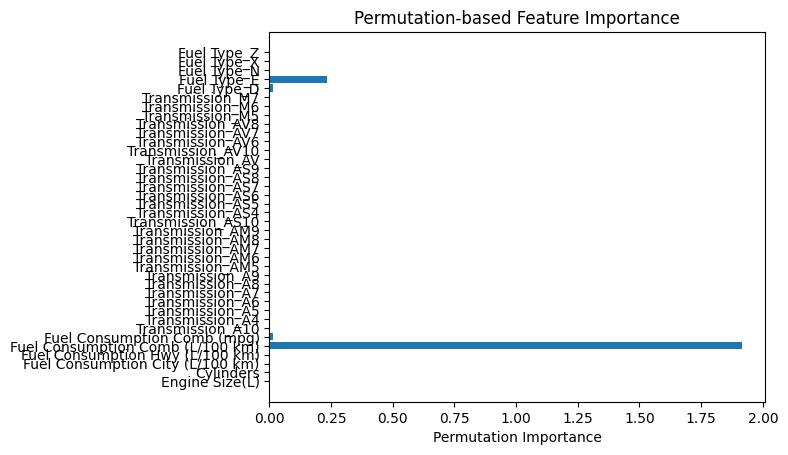

In [39]:
# Bar plot for feature importance
mean_importances = result['importances_mean']
feature_names = X_test.columns

plt.barh(feature_names, mean_importances)
plt.xlabel('Permutation Importance')
plt.title('Permutation-based Feature Importance')
plt.show()

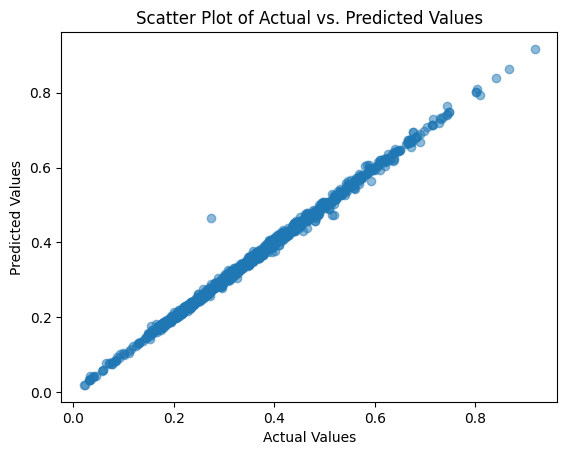

In [40]:
plt.scatter(yp_test, yp_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

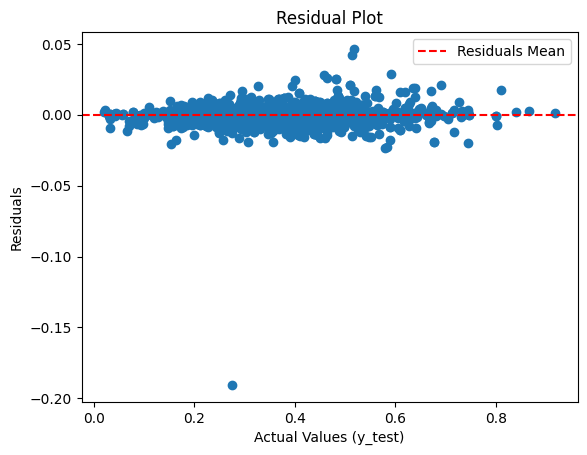

In [41]:
residuals_p = yp_test - yp_pred

plt.scatter(yp_test, residuals_p)
plt.axhline(y=0, color='red', linestyle='--', label="Residuals Mean")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

# **Inference from Permutation based feature selection method**
1.
Most Important Feature: Fuel Consumption Comb (L/100 km)

It has the highest importance score (1.9143), indicating that it significantly influences the prediction of CO2 emissions.

2.
Fuel Type Features:

Fuel Type_E has a moderate importance score (0.233), suggesting it contributes to the model's predictive capability.
Fuel Type_D has a lower importance score (0.01395), indicating a relatively smaller impact on the predictions.

3.
Fuel Consumption and Engine Characteristics:

Fuel Consumption Comb (mpg) has a small importance score (0.0139), indicating a contribution to the model.
Engine Size(L) has a very low importance score (0.00032) showing  minimal impact

4.

A negative importance score indicates that permuting that feature resulted in a decrease in the model's performance.
Inference from actual and predicted values for Permutation Based feature selection

MSE close to zero (6.01e-05) indicates that model's predictions are very accurate.

R-squared value of 0.9968 means that approximately 99.68% of the variance in "CO2 Emissions(g/km)" is explained.

5.
Most residuals are clustered around the mean of zero, which indicates that the model is performing well.
There is one point that stands out at the bottom, which could be an instance where the model dint predict well.

**All three feature selection methods have an overlap and indicates that independent features - Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg), Fuel Type E are important features to predict the dependant variable**


#Q11.Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [42]:
from scipy.stats import zscore

# Calculate Z-scores for the entire DataFrame
z_scores = zscore(data)

# Define a threshold for Z-score (3 standard deviations from the mean)
threshold = 3

# mask for outliers
outlier_mask = (np.abs(z_scores) < threshold).all(axis=1)

# Filter out outliers
data_no_outliers = data[outlier_mask]

data_no_outliers

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.346667,0.230769,0.291667,0.222892,0.268182,0.293103,0.314554,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.146667,0.076923,0.246212,0.222892,0.240909,0.327586,0.288732,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,0.146667,0.076923,0.265152,0.259036,0.263636,0.310345,0.319249,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,0.146667,0.076923,0.284091,0.277108,0.281818,0.275862,0.338028,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,0.146667,0.076923,0.265152,0.259036,0.263636,0.310345,0.319249,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# Split the dataset into training and testing sets

X_outliers = data.drop("CO2 Emissions(g/km)", axis=1)
y_outliers = data["CO2 Emissions(g/km)"]
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)


rf_model_with_outliers = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_with_outliers.fit(X_train, y_train)

# Make predictions on the test set
y_pred_with_outliers = rf_model_with_outliers.predict(X_test)

# Evaluate the model (with outliers)
mse_with_outliers = mean_squared_error(y_test, y_pred_with_outliers)
r2_with_outliers = r2_score(y_test, y_pred_with_outliers)

print("Performance with outliers:")
print(f"Mean Squared Error: {mse_with_outliers}")
print(f"R-squared: {r2_with_outliers}")


Performance with outliers:
Mean Squared Error: 6.010623242841594e-05
R-squared: 0.9968287732008153


In [44]:
# Split the modified dataset into training and testing sets
X_no_outliers = data_no_outliers.drop("CO2 Emissions(g/km)", axis=1)
y_no_outliers = data_no_outliers["CO2 Emissions(g/km)"]
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)
rf_model_no_outliers = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set
y_pred_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)

# Evaluate the model (without outliers)
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)

print("\nPerformance without outliers:")
print(f"Mean Squared Error: {mse_no_outliers}")
print(f"R-squared: {r2_no_outliers}")


Performance without outliers:
Mean Squared Error: 2.7726208160660443e-05
R-squared: 0.998318037599165


# **Inference - With Outliers vs Without Outliers**

1. Mean Squared Error (MSE):

With outliers: 6.01189369660963e-05
Without outliers: 2.7726208160660443e-05

A lower MSE indicates better predictive performance. In this case, the MSE has decreased after removing outliers implying that model's predictions are closer to the actual values.

2. R-squared:

With outliers: 0.9968281029047622
Without outliers: 0.998318037599165

The R-squared has increased after removing outliers indicating an improved fit of the model to the data.

**The model seems to perform better without outliers as indicated by the lower MSE and higher R-squared values.**

#Q12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

1.
Iterative Imputer Method:

 Iterative Imputer is a method for imputing missing values in a dataset.It is based on an iterative regression algorithm that models each feature with missing values as a function of the other features where in each iteration, it builds a regression model for each feature with missing values treating other features as predictors.

2.
Median Imputation Method:

 It involves replacing missing values with the median of the observed (non-missing) values for a particular feature.

3. Mode Imputation Method:

 Mode is the most frequently occurring value in a dataset or a specific column. The process of mode imputation involves replacing missing values with the mode of the respective column

# **Iterative Imputer Method (1% missing data)**

In [47]:
#copy data to another dataset
data_with_missing_1 = data.copy()

data_with_missing_1.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
#setting a seed to generate the same sequence of random numbers everytime; for reproducibility

np.random.seed(42)

# Columns to create missing values

columns_to_create_missing = ['Fuel Consumption Comb (mpg)', 'Fuel Type_E']

# Creating a mask for 1% missing values in specified columns

mask = np.random.rand(data_with_missing_1.shape[0], len(columns_to_create_missing)) < 0.01

# Replacing missing values with NaN in specified columns using .loc

data_with_missing_1.loc[:, columns_to_create_missing] = np.where(mask, np.nan, data_with_missing_1[columns_to_create_missing])


data_with_missing_1.head(10)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0,0,0,...,1,0,0,0,0,0,0.0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
5,0.346667,0.230769,0.291667,0.222892,0.268182,0.293103,0.314554,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1


In [49]:
data_with_missing_1.isnull().sum()

Engine Size(L)                       0
Cylinders                            0
Fuel Consumption City (L/100 km)     0
Fuel Consumption Hwy (L/100 km)      0
Fuel Consumption Comb (L/100 km)     0
Fuel Consumption Comb (mpg)         70
CO2 Emissions(g/km)                  0
Transmission_A10                     0
Transmission_A4                      0
Transmission_A5                      0
Transmission_A6                      0
Transmission_A7                      0
Transmission_A8                      0
Transmission_A9                      0
Transmission_AM5                     0
Transmission_AM6                     0
Transmission_AM7                     0
Transmission_AM8                     0
Transmission_AM9                     0
Transmission_AS10                    0
Transmission_AS4                     0
Transmission_AS5                     0
Transmission_AS6                     0
Transmission_AS7                     0
Transmission_AS8                     0
Transmission_AS9         

In [50]:
!pip install scikit-learn
!pip install fancyimpute

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Impute missing values using Iterative imputer

imputer = IterativeImputer(random_state=42)
data_imputed = imputer.fit_transform(data_with_missing_1)

# Convert the imputed array back to a DataFrame

data_imputed_1_df = pd.DataFrame(data_imputed, columns=data_with_missing_1.columns)

# Display the imputed DataFrame

data_imputed_1_df.head(10)

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=b52ce807e3de290882c9cd4a026ef1725a8439f19c083d48a0f8a2f4f3a4c839
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=2af60b7aebe342d3f632ca45663a85996ed27ccd380fb3be7403c57a3dd43fc3
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.346667,0.230769,0.291667,0.222892,0.268182,0.293103,0.314554,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
data_imputed_1_df.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Transmission_A10                    0
Transmission_A4                     0
Transmission_A5                     0
Transmission_A6                     0
Transmission_A7                     0
Transmission_A8                     0
Transmission_A9                     0
Transmission_AM5                    0
Transmission_AM6                    0
Transmission_AM7                    0
Transmission_AM8                    0
Transmission_AM9                    0
Transmission_AS10                   0
Transmission_AS4                    0
Transmission_AS5                    0
Transmission_AS6                    0
Transmission_AS7                    0
Transmission_AS8                    0
Transmission_AS9                    0
Transmission

Fuel Consumption Comb (mpg) - % Error on Residuals: 4.03%
Bias: 0.0044
Variance: 0.0157


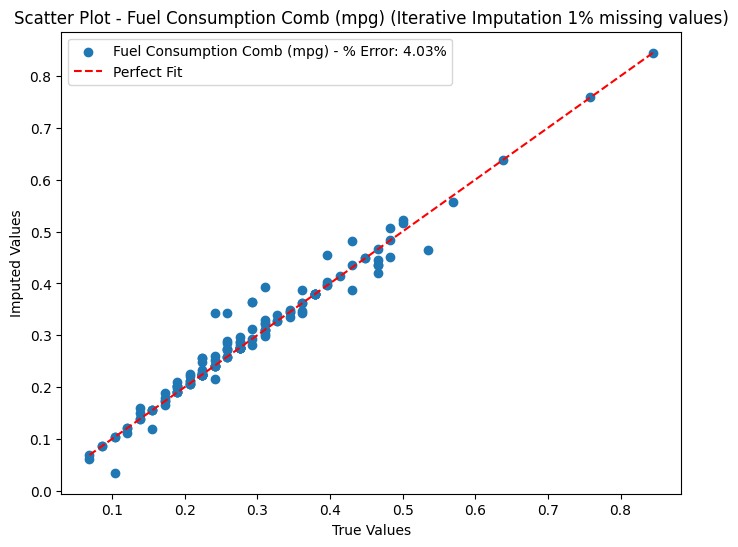

Fuel Type_E - % Error on Residuals: 0.00%
Bias: -0.0000
Variance: 0.0590


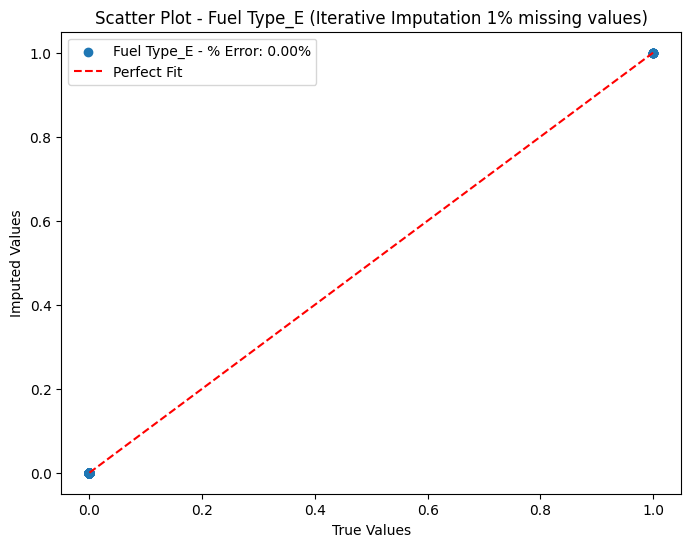

In [53]:
# Check % Error on Residuals for Numeric Data
from sklearn.metrics import mean_absolute_error

original_data = data.copy()

for column in columns_to_create_missing:
    true_values = original_data[column].loc[mask]
    imputed_values = data_imputed_1_df[column].loc[mask]

    error_percentage = mean_absolute_error(true_values, imputed_values) / np.mean(np.abs(true_values)) * 100

    print(f'{column} - % Error on Residuals: {error_percentage:.2f}%')

    bias = np.mean(imputed_values - true_values)
    print(f'Bias: {bias:.4f}')

    variance = np.var(imputed_values)
    print(f'Variance: {variance:.4f}')

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, imputed_values, label=f'{column} - % Error: {error_percentage:.2f}%')
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], linestyle='--', color='red', label='Perfect Fit')
    plt.title(f'Scatter Plot - {column} (Iterative Imputation 1% missing values)')
    plt.xlabel('True Values')
    plt.ylabel('Imputed Values')
    plt.legend()
    plt.show()

# **Inference**

1. Mean Absolute Error (MAE) is the average absolute differences between the predicted and actual values in a dataset

 The values suggest that the imputation for 'Fuel Consumption Comb (mpg)' has an average error of 4.03%, while the imputation for 'Fuel Type_E' has no error (0.00%). The lower the error percentage, the closer the imputed values are to the original non-missing values

2. Bias measures the average difference between the imputed values and the true values.

 Here the bias is close to zero for both imputed features so this means imputed values are very close to the true values.

3. Variance measures the variability of the imputed values. The variance value is low indicating that the imputed values are  stable and consistent

# **Iterative Imputer Method (5% missing data)**

In [54]:
# Copy data to another dataset
data_with_missing_2 = data.copy()

# Setting a seed to generate the same sequence of random numbers every time; for reproducibility
np.random.seed(42)

# Columns to create missing values
columns_to_create_missing_2 = ['Fuel Consumption Comb (mpg)', 'Fuel Type_E']

# Creating a mask for 5% missing values in specified columns
mask_5 = np.random.rand(data_with_missing_2.shape[0], len(columns_to_create_missing_2)) < 0.05

# Replacing missing values with NaN in specified columns using .loc
data_with_missing_2.loc[:, columns_to_create_missing_2] = np.where(mask_5, np.nan, data_with_missing_2[columns_to_create_missing_2])

data_with_missing_2.head(10)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0,0,0,...,1,0,0,0,0,0,0.0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
5,0.346667,0.230769,0.291667,0.222892,0.268182,NaN,0.314554,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1


In [56]:
data_with_missing_2.isnull().sum()

Engine Size(L)                        0
Cylinders                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)         352
CO2 Emissions(g/km)                   0
Transmission_A10                      0
Transmission_A4                       0
Transmission_A5                       0
Transmission_A6                       0
Transmission_A7                       0
Transmission_A8                       0
Transmission_A9                       0
Transmission_AM5                      0
Transmission_AM6                      0
Transmission_AM7                      0
Transmission_AM8                      0
Transmission_AM9                      0
Transmission_AS10                     0
Transmission_AS4                      0
Transmission_AS5                      0
Transmission_AS6                      0
Transmission_AS7                      0
Transmission_AS8                      0


In [57]:
# Impute missing values using MICE imputer
imputer_2 = IterativeImputer(random_state=42)
data_imputed_2 = imputer.fit_transform(data_with_missing_2)

# Convert the imputed array back to a DataFrame
data_imputed_df_2 = pd.DataFrame(data_imputed_2, columns=data_with_missing_2.columns)

# Display the imputed DataFrame
data_imputed_df_2.head(10)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.346667,0.230769,0.291667,0.222892,0.268182,0.324477,0.314554,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
data_imputed_df_2.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Transmission_A10                    0
Transmission_A4                     0
Transmission_A5                     0
Transmission_A6                     0
Transmission_A7                     0
Transmission_A8                     0
Transmission_A9                     0
Transmission_AM5                    0
Transmission_AM6                    0
Transmission_AM7                    0
Transmission_AM8                    0
Transmission_AM9                    0
Transmission_AS10                   0
Transmission_AS4                    0
Transmission_AS5                    0
Transmission_AS6                    0
Transmission_AS7                    0
Transmission_AS8                    0
Transmission_AS9                    0
Transmission

Fuel Consumption Comb (mpg) - % Error on Residuals: 4.09%
Bias: 0.0045
Variance: 0.0157


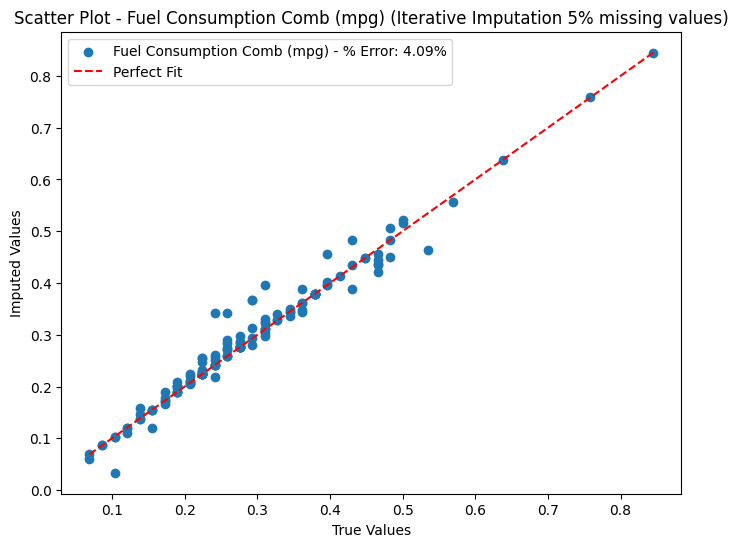

Fuel Type_E - % Error on Residuals: 0.00%
Bias: -0.0000
Variance: 0.0590


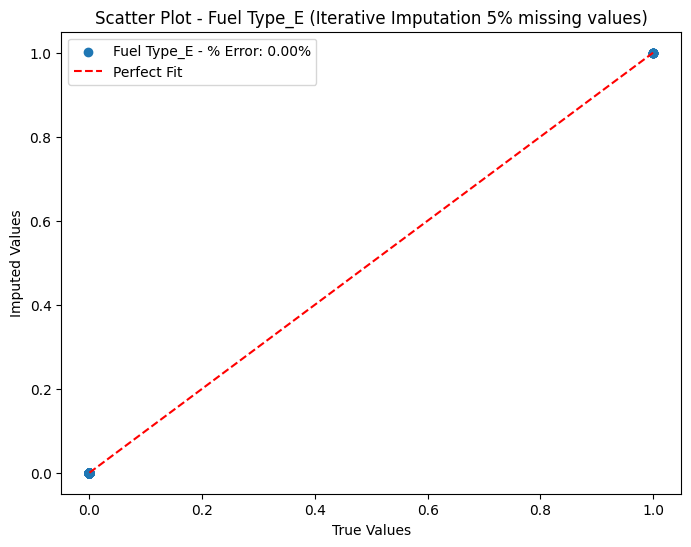

In [59]:
# Check % Error on Residuals for Numeric Data

for column in columns_to_create_missing_2:
    true_values_2 = original_data[column].loc[mask]
    imputed_values_2 = data_imputed_df_2[column].loc[mask]

    error_percentage_2 = mean_absolute_error(true_values_2, imputed_values_2) / np.mean(np.abs(true_values_2)) * 100

    print(f'{column} - % Error on Residuals: {error_percentage_2:.2f}%')

    bias_2 = np.mean(imputed_values_2 - true_values_2)
    print(f'Bias: {bias_2:.4f}')


    variance_2 = np.var(imputed_values_2)
    print(f'Variance: {variance_2:.4f}')


    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values_2, imputed_values_2, label=f'{column} - % Error: {error_percentage_2:.2f}%')
    plt.plot([min(true_values_2), max(true_values_2)], [min(true_values_2), max(true_values_2)], linestyle='--', color='red', label='Perfect Fit')
    plt.title(f'Scatter Plot - {column} (Iterative Imputation 5% missing values)')
    plt.xlabel('True Values')
    plt.ylabel('Imputed Values')
    plt.legend()
    plt.show()


# **Inference**
1. Mean Absolute Error (MAE) is the average absolute differences between the predicted and actual values in a dataset

 The values suggest that the imputation for 'Fuel Consumption Comb (mpg)' has an average error of 4.09%, while the imputation for 'Fuel Type_E' has no error (0.00%). The lower the error percentage, the closer the imputed values are to the original non-missing values


2. Bias measures the average difference between the imputed values and the true values. Here the bias is close to zero so the imputed values are very close to the true values.

3. Variance measures the variability of the imputed values. The variance value is low indicating that the imputed values are stable and consistent

# **Iterative Imputer Method (10% missing data)**

In [60]:
# Copy data to another dataset
data_with_missing_3 = data.copy()

# Setting a seed to generate the same sequence of random numbers every time; for reproducibility
np.random.seed(42)

# Columns to create missing values
columns_to_create_missing_3 = ['Fuel Consumption Comb (mpg)', 'Fuel Type_E']

# Creating a mask for 10% missing values in specified columns
mask_10 = np.random.rand(data_with_missing_3.shape[0], len(columns_to_create_missing_3)) < 0.1

# Replacing missing values with NaN in specified columns using .loc
data_with_missing_3.loc[:, columns_to_create_missing_3] = np.where(mask_10, np.nan, data_with_missing_3[columns_to_create_missing_3])

data_with_missing_3.head(10)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0,0,0,...,1,0,0,0,0,0,0.0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,NaN,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
5,0.346667,0.230769,0.291667,0.222892,0.268182,NaN,0.314554,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1


In [61]:
data_with_missing_3.isnull().sum()

Engine Size(L)                        0
Cylinders                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)         728
CO2 Emissions(g/km)                   0
Transmission_A10                      0
Transmission_A4                       0
Transmission_A5                       0
Transmission_A6                       0
Transmission_A7                       0
Transmission_A8                       0
Transmission_A9                       0
Transmission_AM5                      0
Transmission_AM6                      0
Transmission_AM7                      0
Transmission_AM8                      0
Transmission_AM9                      0
Transmission_AS10                     0
Transmission_AS4                      0
Transmission_AS5                      0
Transmission_AS6                      0
Transmission_AS7                      0
Transmission_AS8                      0


In [62]:
# Impute missing values using MICE imputer
imputer_3 = IterativeImputer(random_state=42)
data_imputed_mice_3 = imputer.fit_transform(data_with_missing_3)

# Convert the imputed array back to a DataFrame
data_imputed_mice_df_3 = pd.DataFrame(data_imputed_mice_3, columns=data_with_missing_3.columns)

# Display the imputed DataFrame
data_imputed_mice_df_3.head(10)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.279781,0.373239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.346667,0.230769,0.291667,0.222892,0.268182,0.325326,0.314554,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
data_imputed_mice_df_3.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Transmission_A10                    0
Transmission_A4                     0
Transmission_A5                     0
Transmission_A6                     0
Transmission_A7                     0
Transmission_A8                     0
Transmission_A9                     0
Transmission_AM5                    0
Transmission_AM6                    0
Transmission_AM7                    0
Transmission_AM8                    0
Transmission_AM9                    0
Transmission_AS10                   0
Transmission_AS4                    0
Transmission_AS5                    0
Transmission_AS6                    0
Transmission_AS7                    0
Transmission_AS8                    0
Transmission_AS9                    0
Transmission

Fuel Consumption Comb (mpg) - % Error on Residuals: 4.16%
Bias: 0.0047
Variance: 0.0158


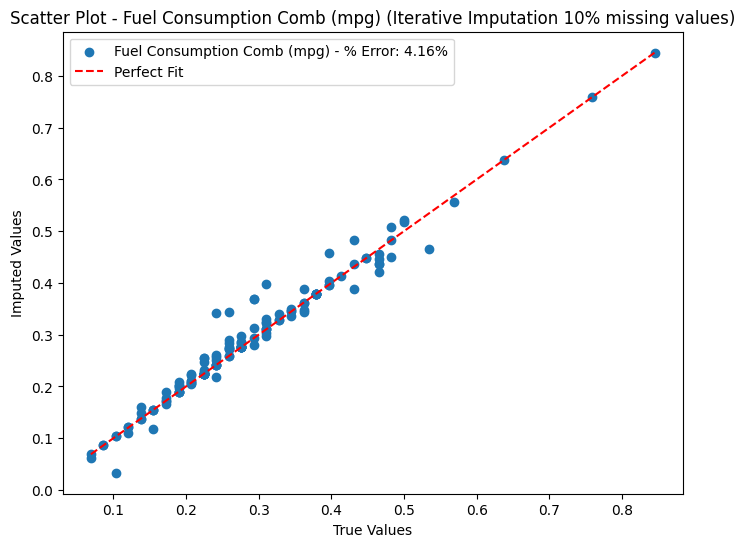

Fuel Type_E - % Error on Residuals: 0.00%
Bias: -0.0000
Variance: 0.0590


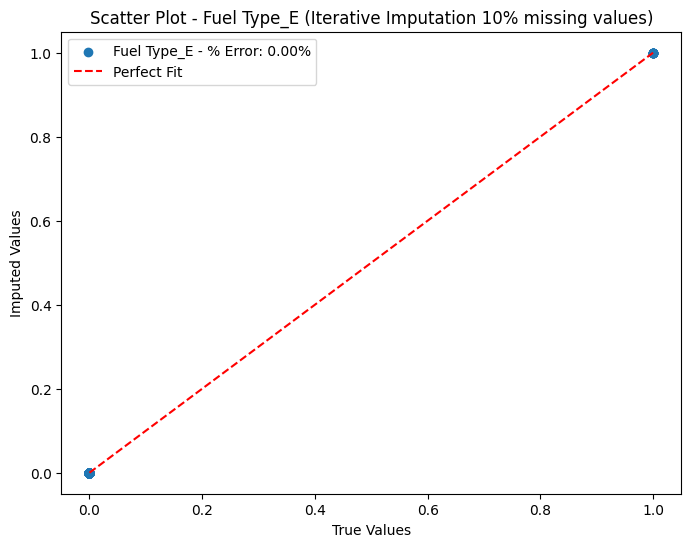

In [64]:
# Check % Error on Residuals for Numeric Data

for column in columns_to_create_missing_3:
    true_values_3 = original_data[column].loc[mask]
    imputed_values_3 = data_imputed_mice_df_3[column].loc[mask]

    error_percentage_3 = mean_absolute_error(true_values_3, imputed_values_3) / np.mean(np.abs(true_values_3)) * 100

    print(f'{column} - % Error on Residuals: {error_percentage_3:.2f}%')

    bias_3 = np.mean(imputed_values_3 - true_values_3)
    print(f'Bias: {bias_3:.4f}')

    variance_3 = np.var(imputed_values_3)
    print(f'Variance: {variance_3:.4f}')

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values_3, imputed_values_3, label=f'{column} - % Error: {error_percentage_3:.2f}%')
    plt.plot([min(true_values_3), max(true_values_3)], [min(true_values_3), max(true_values_3)], linestyle='--', color='red', label='Perfect Fit')
    plt.title(f'Scatter Plot - {column} (Iterative Imputation 10% missing values)')
    plt.xlabel('True Values')
    plt.ylabel('Imputed Values')
    plt.legend()
    plt.show()


# **Inference**
1. Mean Absolute Error (MAE) is the average absolute differences between the predicted and actual values in a dataset

 The values suggest that the imputation for 'Fuel Consumption Comb (mpg)' has an average error of 4.16%, while the imputation for 'Fuel Type_E' has no error (0.00%). The lower the error percentage, the closer the imputed values are to the original non-missing values

2. Bias measures the average difference between the imputed values and the true values. Here the bias is close to zero so the imputed values are very close to the true values.

3. Variance measures the variability of the imputed values. The variance value is low indicating that the imputed values are stable and consistent

# **Median Imputation method (1% missing data)**

In [65]:
# Copy data to another dataset
data_with_missing_median = data.copy()

# Setting a seed to generate the same sequence of random numbers every time; for reproducibility
np.random.seed(42)

# Columns to create missing values
columns_to_create_missing_median = ['Fuel Consumption Comb (mpg)', 'Fuel Type_E']

# Creating a mask for 10% missing values in specified columns
mask_median = np.random.rand(data_with_missing_median.shape[0], len(columns_to_create_missing_median)) < 0.01

# Replacing missing values with NaN in specified columns using .loc
data_with_missing_median.loc[:, columns_to_create_missing_median] = np.where(mask_median, np.nan, data_with_missing_median[columns_to_create_missing_median])

data_with_missing_median.head(10)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0,0,0,...,1,0,0,0,0,0,0.0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
5,0.346667,0.230769,0.291667,0.222892,0.268182,0.293103,0.314554,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1


In [66]:
data_with_missing_median.isnull().sum()

Engine Size(L)                       0
Cylinders                            0
Fuel Consumption City (L/100 km)     0
Fuel Consumption Hwy (L/100 km)      0
Fuel Consumption Comb (L/100 km)     0
Fuel Consumption Comb (mpg)         70
CO2 Emissions(g/km)                  0
Transmission_A10                     0
Transmission_A4                      0
Transmission_A5                      0
Transmission_A6                      0
Transmission_A7                      0
Transmission_A8                      0
Transmission_A9                      0
Transmission_AM5                     0
Transmission_AM6                     0
Transmission_AM7                     0
Transmission_AM8                     0
Transmission_AM9                     0
Transmission_AS10                    0
Transmission_AS4                     0
Transmission_AS5                     0
Transmission_AS6                     0
Transmission_AS7                     0
Transmission_AS8                     0
Transmission_AS9         

In [67]:
#Imputing values

for column in columns_to_create_missing_median:
    data_with_missing_median[column].fillna(data_with_missing_median[column].median(), inplace=True)

# Display the first 10 rows of the imputed dataset
data_with_missing_median.head(10)


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,0.146667,0.076923,0.215909,0.162651,0.200000,0.379310,0.234742,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
1,0.200000,0.076923,0.265152,0.222892,0.250000,0.310345,0.293427,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,0.080000,0.076923,0.068182,0.108434,0.081818,0.637931,0.093897,0,0,0,...,1,0,0,0,0,0,0.0,0,0,1
3,0.346667,0.230769,0.321970,0.307229,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
4,0.346667,0.230769,0.299242,0.283133,0.295455,0.275862,0.347418,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
5,0.346667,0.230769,0.291667,0.222892,0.268182,0.293103,0.314554,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
6,0.346667,0.230769,0.287879,0.246988,0.272727,0.293103,0.319249,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
7,0.373333,0.230769,0.325758,0.301205,0.318182,0.241379,0.373239,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
8,0.373333,0.230769,0.348485,0.331325,0.340909,0.224138,0.401408,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
9,0.200000,0.076923,0.242424,0.210843,0.231818,0.344828,0.272300,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1


In [68]:
data_with_missing_median.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Transmission_A10                    0
Transmission_A4                     0
Transmission_A5                     0
Transmission_A6                     0
Transmission_A7                     0
Transmission_A8                     0
Transmission_A9                     0
Transmission_AM5                    0
Transmission_AM6                    0
Transmission_AM7                    0
Transmission_AM8                    0
Transmission_AM9                    0
Transmission_AS10                   0
Transmission_AS4                    0
Transmission_AS5                    0
Transmission_AS6                    0
Transmission_AS7                    0
Transmission_AS8                    0
Transmission_AS9                    0
Transmission

Fuel Consumption Comb (mpg) - % Error on Residuals (Median Imputation): 17.53%
Bias: -0.0000
Variance: 0.0590


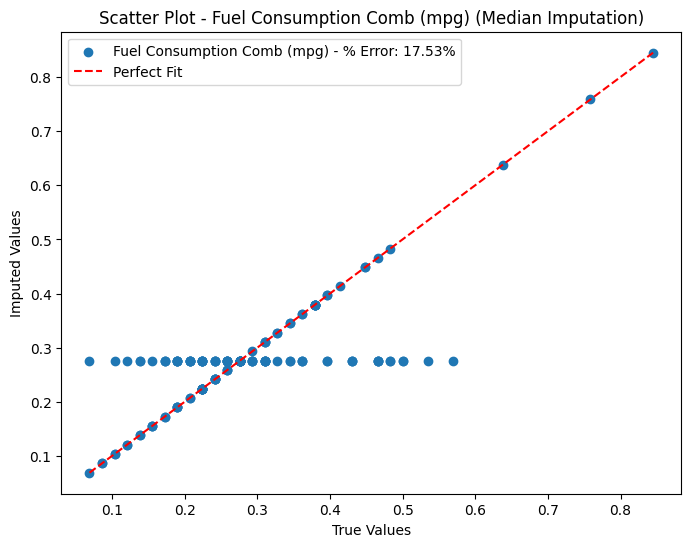

Fuel Type_E - % Error on Residuals (Median Imputation): 55.56%
Bias: -0.0000
Variance: 0.0590


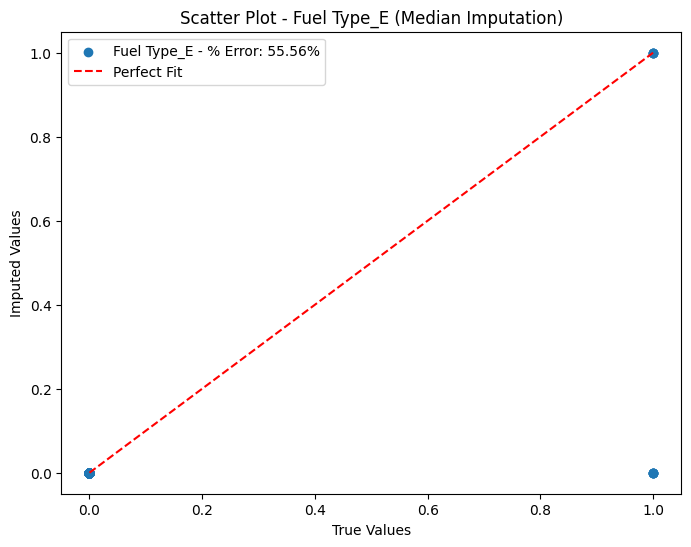

In [69]:
for column in columns_to_create_missing_median:
    true_values_median = original_data[column].loc[mask_median]
    imputed_values_median = data_with_missing_median[column].loc[mask_median]

    error_percentage_median = np.mean(np.abs((true_values_median - imputed_values_median) / true_values_median)) * 100

    print(f'{column} - % Error on Residuals (Median Imputation): {error_percentage_median:.2f}%')

    bias_median = np.mean(imputed_values_median - true_values_median)
    print(f'Bias: {bias_3:.4f}')

    variance_median = np.var(imputed_values_median)
    print(f'Variance: {variance_3:.4f}')

        # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values_median, imputed_values_median, label=f'{column} - % Error: {error_percentage_median:.2f}%')
    plt.plot([min(true_values_median), max(true_values_median)], [min(true_values_median), max(true_values_median)], linestyle='--', color='red', label='Perfect Fit')
    plt.title(f'Scatter Plot - {column} (Median Imputation)')
    plt.xlabel('True Values')
    plt.ylabel('Imputed Values')
    plt.legend()
    plt.show()

# **Inference**
The median imputation does not introduce any systematic bias, the underestimation and overestimation could be balancing each other out, and results in 17.53% for Fuel Consumption Comb and 55.56% error on residuals and variability of 0.0590.**This means that the imputation technique is not perfectly predicting the missing values**

# **Median Imputation method (5% missing data)**

In [70]:
# Copy data to another dataset
data_with_missing_median_5 = data.copy()

# Setting a seed to generate the same sequence of random numbers every time; for reproducibility
np.random.seed(42)

# Columns to create missing values
columns_to_create_missing_median_5 = ['Fuel Consumption Comb (mpg)', 'Fuel Type_E']

# Creating a mask for 5% missing values in specified columns
mask_median_5 = np.random.rand(data_with_missing_median_5.shape[0], len(columns_to_create_missing_median_5)) < 0.05

# Replacing missing values with NaN in specified columns using .loc
data_with_missing_median_5.loc[:, columns_to_create_missing_median_5] = np.where(mask_median_5, np.nan, data_with_missing_median_5[columns_to_create_missing_median_5])

print("Total no of missing values before imputation",data_with_missing_median_5.isnull().sum())

for column in columns_to_create_missing_median_5:
    data_with_missing_median_5[column].fillna(data_with_missing_median_5[column].median(), inplace=True)

print("Total no of missing values after imputation",data_with_missing_median_5.isnull().sum())


Total no of missing values before imputation Engine Size(L)                        0
Cylinders                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)         352
CO2 Emissions(g/km)                   0
Transmission_A10                      0
Transmission_A4                       0
Transmission_A5                       0
Transmission_A6                       0
Transmission_A7                       0
Transmission_A8                       0
Transmission_A9                       0
Transmission_AM5                      0
Transmission_AM6                      0
Transmission_AM7                      0
Transmission_AM8                      0
Transmission_AM9                      0
Transmission_AS10                     0
Transmission_AS4                      0
Transmission_AS5                      0
Transmission_AS6                      0
Transmission_AS7                   

Fuel Consumption Comb (mpg) - % Error on Residuals (Median Imputation): 25.61%
Bias: -0.0039
Variance: 0.0077


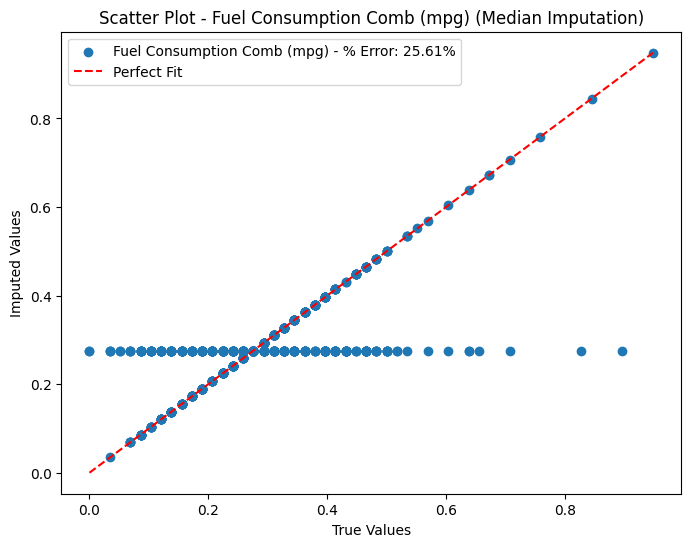

Fuel Type_E - % Error on Residuals (Median Imputation): 65.12%
Bias: -0.0381
Variance: 0.0200


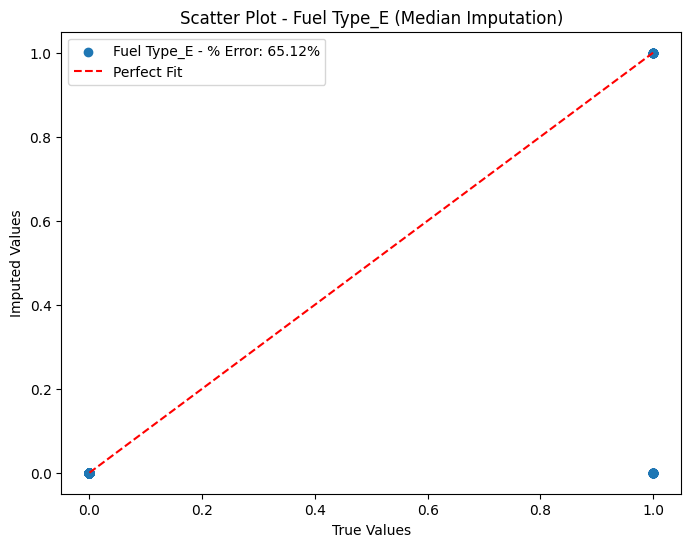

In [71]:
for column in columns_to_create_missing_median_5:

    true_values_median_5 = original_data[column].loc[mask_median_5]
    imputed_values_median_5 = data_with_missing_median_5[column].loc[mask_median_5]

    #was getting o/p as ind% because of division by 0 so checking non zero values

    mask_non_zero = true_values_median_5 != 0
    error_percentage_median_5 = np.mean(np.abs((true_values_median_5[mask_non_zero] - imputed_values_median_5[mask_non_zero]) / true_values_median_5[mask_non_zero])) * 100

    print(f'{column} - % Error on Residuals (Median Imputation): {error_percentage_median_5:.2f}%')

    bias_median_5 = np.mean(imputed_values_median_5 - true_values_median_5)
    print(f'Bias: {bias_median_5:.4f}')

    variance_median_5 = np.var(imputed_values_median_5)
    print(f'Variance: {variance_median_5:.4f}')

        # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values_median_5, imputed_values_median_5, label=f'{column} - % Error: {error_percentage_median_5:.2f}%')
    plt.plot([min(true_values_median_5), max(true_values_median_5)], [min(true_values_median_5), max(true_values_median_5)], linestyle='--', color='red', label='Perfect Fit')
    plt.title(f'Scatter Plot - {column} (Median Imputation)')
    plt.xlabel('True Values')
    plt.ylabel('Imputed Values')
    plt.legend()
    plt.show()

# **Inference**

The median imputation does introduces negative bias which means imputed values are lower than true values and results in 25.61% for Fuel Consumption Comb and 65.12% error on residuals and variability of 0.0077 and 0.020 respectively. **This means that the imputation technique is not perfectly predicting the missing values**


# **Median Imputation method (10% missing data)**

In [72]:
# Copy data to another dataset
data_with_missing_median_10 = data.copy()

# Setting a seed to generate the same sequence of random numbers every time; for reproducibility
np.random.seed(42)

# Columns to create missing values
columns_to_create_missing_median_10 = ['Fuel Consumption Comb (mpg)', 'Fuel Type_E']

# Creating a mask for 10% missing values in specified columns
mask_median_10 = np.random.rand(data_with_missing_median_10.shape[0], len(columns_to_create_missing_median_10)) < 0.1

# Replacing missing values with NaN in specified columns using .loc
data_with_missing_median_10.loc[:, columns_to_create_missing_median_10] = np.where(mask_median_10, np.nan, data_with_missing_median_10[columns_to_create_missing_median_10])

print("Total no of missing values before imputation",data_with_missing_median_10.isnull().sum())

for column in columns_to_create_missing_median_10:
    data_with_missing_median_10[column].fillna(data_with_missing_median_10[column].median(), inplace=True)

print("Total no of missing values after imputation",data_with_missing_median_10.isnull().sum())


Total no of missing values before imputation Engine Size(L)                        0
Cylinders                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)         728
CO2 Emissions(g/km)                   0
Transmission_A10                      0
Transmission_A4                       0
Transmission_A5                       0
Transmission_A6                       0
Transmission_A7                       0
Transmission_A8                       0
Transmission_A9                       0
Transmission_AM5                      0
Transmission_AM6                      0
Transmission_AM7                      0
Transmission_AM8                      0
Transmission_AM9                      0
Transmission_AS10                     0
Transmission_AS4                      0
Transmission_AS5                      0
Transmission_AS6                      0
Transmission_AS7                   

Fuel Consumption Comb (mpg) - % Error on Residuals (Median Imputation): 27.11%
Bias: -0.0012
Variance: 0.0081


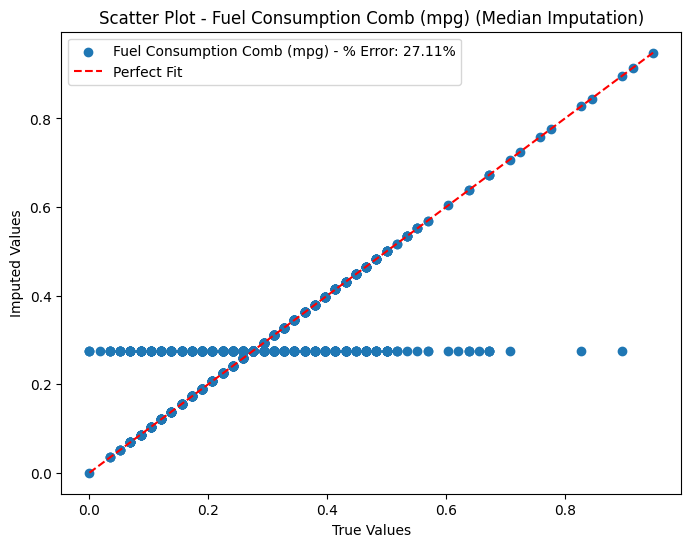

Fuel Type_E - % Error on Residuals (Median Imputation): 54.22%
Bias: -0.0299
Variance: 0.0246


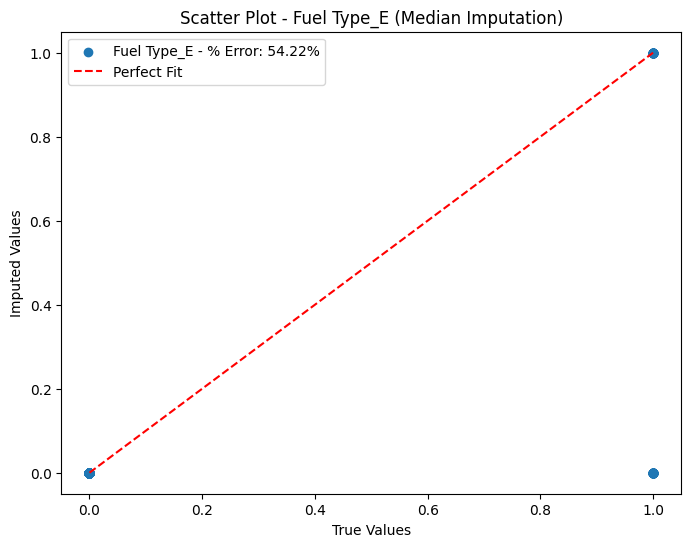

In [73]:
for column in columns_to_create_missing_median_10:

    true_values_median_10 = original_data[column].loc[mask_median_10]
    imputed_values_median_10 = data_with_missing_median_10[column].loc[mask_median_10]

    #was getting o/p as ind% because of division by 0 so checking non zero values

    mask_non_zero_10 = true_values_median_10 != 0
    error_percentage_median_10 = np.mean(np.abs((true_values_median_10[mask_non_zero_10] - imputed_values_median_10[mask_non_zero_10]) / true_values_median_10[mask_non_zero_10])) * 100

    print(f'{column} - % Error on Residuals (Median Imputation): {error_percentage_median_10:.2f}%')

    bias_median_10 = np.mean(imputed_values_median_10 - true_values_median_10)
    print(f'Bias: {bias_median_10:.4f}')

    variance_median_10 = np.var(imputed_values_median_10)
    print(f'Variance: {variance_median_10:.4f}')

        # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values_median_10, imputed_values_median_10, label=f'{column} - % Error: {error_percentage_median_10:.2f}%')
    plt.plot([min(true_values_median_10), max(true_values_median_10)], [min(true_values_median_10), max(true_values_median_10)], linestyle='--', color='red', label='Perfect Fit')
    plt.title(f'Scatter Plot - {column} (Median Imputation)')
    plt.xlabel('True Values')
    plt.ylabel('Imputed Values')
    plt.legend()
    plt.show()

# **Inference**
The median imputation does introduces negative bias which means imputed values are lower than true values and results in 27.11% for Fuel Consumption Comb and 54.22% error on residuals and variability of 0.0081 and 0.0246 respectively. **This means that the imputation technique is not perfectly predicting the missing values**

# **Mode Imputation Method (1%,5%,10% missing data)**


Missing values before imputation (Missing Percentage: 1%):
Engine Size(L)                       0
Cylinders                            0
Fuel Consumption City (L/100 km)     0
Fuel Consumption Hwy (L/100 km)      0
Fuel Consumption Comb (L/100 km)     0
Fuel Consumption Comb (mpg)         70
CO2 Emissions(g/km)                  0
Transmission_A10                     0
Transmission_A4                      0
Transmission_A5                      0
Transmission_A6                      0
Transmission_A7                      0
Transmission_A8                      0
Transmission_A9                      0
Transmission_AM5                     0
Transmission_AM6                     0
Transmission_AM7                     0
Transmission_AM8                     0
Transmission_AM9                     0
Transmission_AS10                    0
Transmission_AS4                     0
Transmission_AS5                     0
Transmission_AS6                     0
Transmission_AS7                     0
Tran

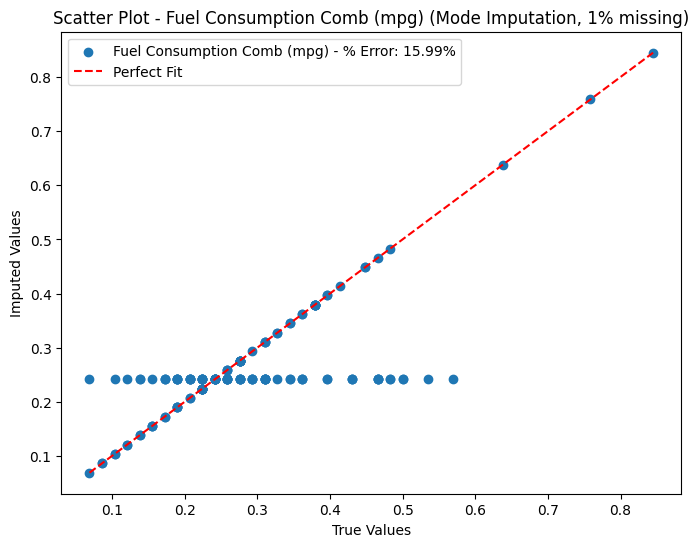


Fuel Type_E - % Error on Residuals (Mode Imputation, 1% missing): 55.56%
Bias: -0.0350
Variance: 0.0272


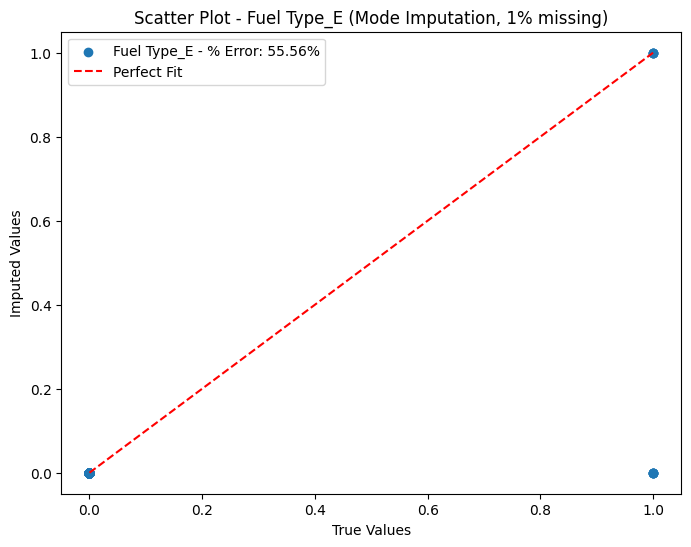


Missing values before imputation (Missing Percentage: 5%):
Engine Size(L)                        0
Cylinders                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)         353
CO2 Emissions(g/km)                   0
Transmission_A10                      0
Transmission_A4                       0
Transmission_A5                       0
Transmission_A6                       0
Transmission_A7                       0
Transmission_A8                       0
Transmission_A9                       0
Transmission_AM5                      0
Transmission_AM6                      0
Transmission_AM7                      0
Transmission_AM8                      0
Transmission_AM9                      0
Transmission_AS10                     0
Transmission_AS4                      0
Transmission_AS5                      0
Transmission_AS6                      0
Transmission_AS7    

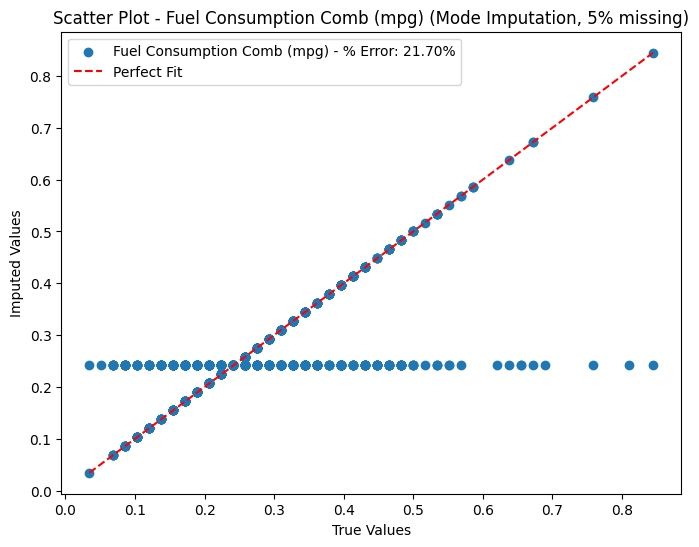


Fuel Type_E - % Error on Residuals (Mode Imputation, 5% missing): 40.62%
Bias: -0.0180
Variance: 0.0256


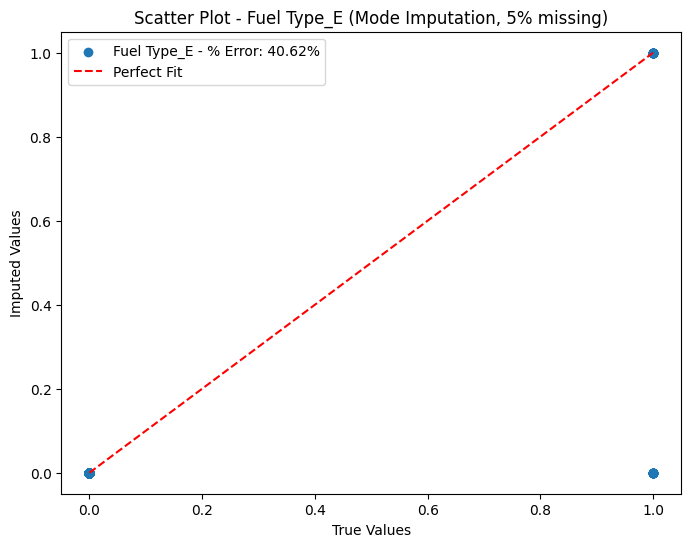


Missing values before imputation (Missing Percentage: 10%):
Engine Size(L)                        0
Cylinders                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)         710
CO2 Emissions(g/km)                   0
Transmission_A10                      0
Transmission_A4                       0
Transmission_A5                       0
Transmission_A6                       0
Transmission_A7                       0
Transmission_A8                       0
Transmission_A9                       0
Transmission_AM5                      0
Transmission_AM6                      0
Transmission_AM7                      0
Transmission_AM8                      0
Transmission_AM9                      0
Transmission_AS10                     0
Transmission_AS4                      0
Transmission_AS5                      0
Transmission_AS6                      0
Transmission_AS7   

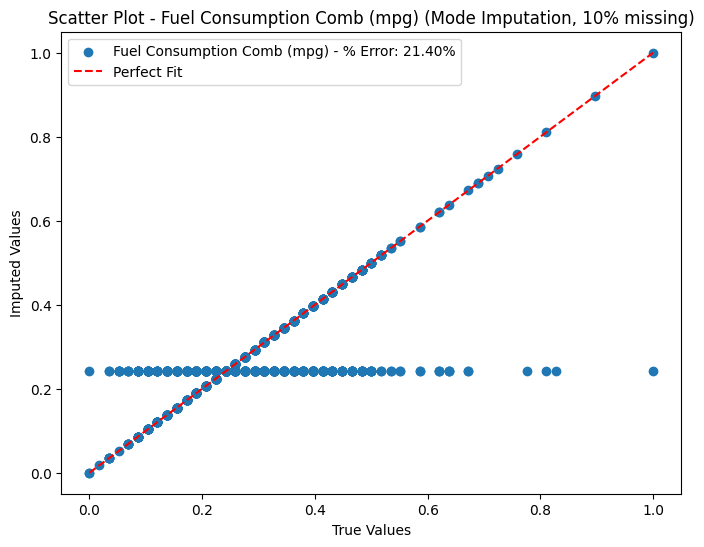


Fuel Type_E - % Error on Residuals (Mode Imputation, 10% missing): 45.24%
Bias: -0.0258
Variance: 0.0303


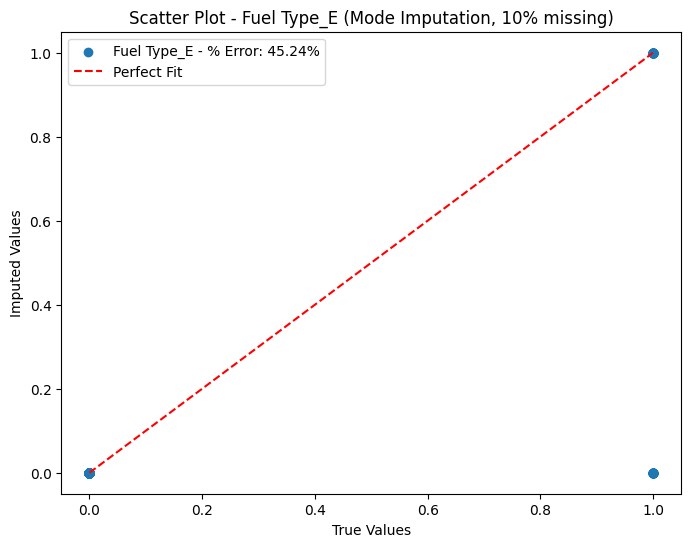

In [76]:
data_with_missing_mode = data.copy()

# Columns to create missing values
columns_to_create_missing_mode = ['Fuel Consumption Comb (mpg)', 'Fuel Type_E']

# Set seed for reproducibility
np.random.seed(42)

# Loop through different missing percentages
for missing_percentage in [1, 5, 10]:

    data_copy = data.copy()

    # Create a mask for missing values
    mask_missing_mode = np.random.rand(data_copy.shape[0], len(columns_to_create_missing_mode)) < (missing_percentage / 100)

    # Replace missing values with NaN in specified columns using .loc
    data_copy.loc[:, columns_to_create_missing_mode] = np.where(mask_missing_mode, np.nan, data_copy[columns_to_create_missing_mode])

    # Print missing values before imputation
    print(f'\nMissing values before imputation (Missing Percentage: {missing_percentage}%):\n{data_copy.isnull().sum()}')

    # Impute missing values with mode
    imputer_mode = SimpleImputer(strategy='most_frequent')
    data_copy[columns_to_create_missing_mode] = imputer_mode.fit_transform(data_copy[columns_to_create_missing_mode])

    # Print missing values after imputation
    print(f'\nMissing values after imputation (Missing Percentage: {missing_percentage}%):\n{data_copy.isnull().sum()}')

    for column in columns_to_create_missing_mode:
        true_values_mode = data[column].loc[mask_missing_mode]
        imputed_values_mode = data_copy[column].loc[mask_missing_mode]

        # Calculate % error in residuals, handling division by zero
        mask_nonzero = true_values_mode != 0
        error_percentage_mode = np.nanmean(np.abs((true_values_mode[mask_nonzero] - imputed_values_mode[mask_nonzero]) / true_values_mode[mask_nonzero])) * 100

        # Calculate bias
        bias_mode = np.mean(imputed_values_mode - true_values_mode)

        # Calculate variance
        variance_mode = np.var(imputed_values_mode)

        print(f'\n{column} - % Error on Residuals (Mode Imputation, {missing_percentage}% missing): {error_percentage_mode:.2f}%')
        print(f'Bias: {bias_mode:.4f}')
        print(f'Variance: {variance_mode:.4f}')

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.scatter(true_values_mode, imputed_values_mode, label=f'{column} - % Error: {error_percentage_mode:.2f}%')
        plt.plot([min(true_values_mode), max(true_values_mode)], [min(true_values_mode), max(true_values_mode)], linestyle='--', color='red', label='Perfect Fit')
        plt.title(f'Scatter Plot - {column} (Mode Imputation, {missing_percentage}% missing)')
        plt.xlabel('True Values')
        plt.ylabel('Imputed Values')
        plt.legend()
        plt.show()


# **Inference**

1. For Fuel Consumption Comb (mpg), the % Error on Residuals remains relatively stable across different missing percentage scenarios (around 20%). But it **indicates that the model dint predict the values well.**

2. For Fuel Type_E, the % Error on Residuals is more sensitive to the percentage of missing data, ranging from 40.62% to 55.56%. This indicates a **higher degree of uncertainty and less accurate predictions, especially as the missing data percentage increases.**

3. The negative bias indiactes that the values were underestimated and **not a good prediction.**

# **Summary**

1. What are the data types?

**Only numeric and categorical data where categorical data was converted into binary form using one hot encoding**

2. Are there missing values?

**No missing data was found in the dataset**

3. What are the likely distributions of the numeric variables?

**Distribution of Engine Size(L) and Cylinders is multimodal distribution with a right skewness, All other independant variables roughly follow normal distribution, there are a few outliers.**

4. Which independent variables are useful to predict a target (dependent variable)?

**OLS method, Random Forest Regressor and Permutation based feature selection method was used to find the most significant features.All three feature selection methods had a high importance score for - Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg), Fuel Type E indicating that they are important independent features to predict the dependant variable.**

5. Which independent variables have missing data? How much?

**No independent variable has missing data**

6. Do the training and test sets have the same data?

The dataset was divided as training data 80%, consisting of pairs of input features (X_train) and their corresponding target values (y_train) and the test data 20%, consisting of pairs of input features (X_test) and their corresponding target values (y_test).

 **After the model was trained using the training data, X_test was used to generate predicted values (y_pred) for the test data (X_test) and y_test served as the actual values for the target variable in the test dataset**

7. In the predictor variables independent of all the other predictor variables?

**Correlation matrix with heatmap was used to identify this.**

8. Which predictor variables are the most important?

**Three important feature selection methods- OLS method, Random Forest Regressor and Permutation based feature selection method was used to find the most significant features.**

9. Do the ranges of the predictor variables make sense?

**The ranges for each variable was calculated and moreover they were normalized to ensure that all features contribute equally to the distance computations and model training**
10. What are the distributions of the predictor variables?

**Distribution of Engine Size(L) and Cylinders is multimodal distribution with a right skewness, All other independant variables roughly follow normal distribution, there are a few outliers.**
11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

**The MSE and rsquared values were computed for before and after outlier removal and implied that MSE has decreased after removing outliers meaning that model's predictions are closer to the actual values and the R-squared has increased after removing outliers indicating an improved fit of the model to the data. were removed**

# **References**

Dataset : https://www.kaggle.com/datasets/bhuviranga/co2-emissions

1. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

2. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb

3. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb

4. https://github.com/mrdbourke/tensorflow-deep-learning/issues/559

5. https://chat.openai.com/

6. https://www.youtube.com/watch?v=dm7YNsN_Nwo&t=52s

7. https://www.youtube.com/watch?v=xiBslXuZ0Rw

8. https://www.youtube.com/watch?v=rsyrZnZ8J2o

9. https://www.youtube.com/watch?v=e7-gCZmKvsI

10. https://www.youtube.com/watch?v=oBa_H5aM7R0

